In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',None)

import warnings
warnings.simplefilter(action='ignore')


In [4]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

In [5]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# importing data

In [6]:
data = pd.read_csv('fixprice.csv',index_col=0)

In [7]:
data1 = pd.read_csv('listings.csv')
data2 = pd.read_csv('Junelistings.csv')

In [8]:
data1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,2014-12-26,0.24,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,2015-10-01,0.18,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,167,90,20,2020-01-17,0.19,8,365
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,95,90,24,2019-10-13,0.22,8,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7318,43862116,Jurong East BLK205 主人房 S$850 可商,162738531,Jane,West Region,Jurong East,1.33850,103.74158,Private room,35,3,0,NaN,NaN,2,31
7319,43865184,“DESIGNER-STYLE” 2 BEDROOMS ON MARINA BAY CBD,21857361,Cyril,Central Region,Downtown Core,1.28116,103.85325,Entire home/apt,231,90,0,NaN,NaN,1,285
7320,43873539,Newly renovated three bedrooms unit,165098680,Anthony,Central Region,Geylang,1.31294,103.88667,Entire home/apt,140,50,0,NaN,NaN,3,79
7321,43875440,Newly Furnished Room (3 mins walk to Novena MRT),282288453,Eunice,Central Region,Novena,1.32063,103.84137,Private room,54,2,0,NaN,NaN,1,90


In [9]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_is_superhost,property_type,bedrooms,beds,guests_included,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,len_amenities
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,0.01,2,365,f,Apartment,1.0,1.0,1,94.0,f,1.0,0.0,0.0,8
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,0.24,1,365,f,Apartment,1.0,1.0,2,91.0,f,1.0,0.0,0.0,12
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,0.18,2,365,f,Apartment,1.0,1.0,1,98.0,f,1.0,0.0,0.0,9
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,167,90,20,0.19,8,365,f,Villa,2.0,3.0,4,89.0,t,1.0,279.0,56.0,27
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,95,90,24,0.22,8,365,f,House,1.0,1.0,1,83.0,t,0.5,139.0,28.0,24


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 0 to 7322
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6954 non-null   int64  
 1   name                            6954 non-null   object 
 2   host_id                         6954 non-null   int64  
 3   host_name                       6954 non-null   object 
 4   neighbourhood_group             6954 non-null   object 
 5   neighbourhood                   6954 non-null   object 
 6   latitude                        6954 non-null   float64
 7   longitude                       6954 non-null   float64
 8   room_type                       6954 non-null   object 
 9   price                           6954 non-null   int64  
 10  minimum_nights                  6954 non-null   int64  
 11  number_of_reviews               6954 non-null   int64  
 12  reviews_per_month               69

# CATEGORICAL FEATURE

In [11]:
categorical_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']
print ('Number of categorical feature:' , len(categorical_feature))

data[categorical_feature].head()

Number of categorical feature: 8


,name,host_name,neighbourhood_group,neighbourhood,room_type,host_is_superhost,property_type,instant_bookable
0,COZICOMFORT LONG TERM STAY ROOM 2,Francesca,North Region,Woodlands,Private room,f,Apartment,f
1,Pleasant Room along Bukit Timah,Sujatha,Central Region,Bukit Timah,Private room,f,Apartment,f
2,COZICOMFORT,Francesca,North Region,Woodlands,Private room,f,Apartment,f
3,Ensuite Room (Room 1 & 2) near EXPO,Belinda,East Region,Tampines,Private room,f,Villa,t
4,B&B Room 1 near Airport & EXPO,Belinda,East Region,Tampines,Private room,f,House,t


In [12]:
categorical_feature

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'host_is_superhost',
 'property_type',
 'instant_bookable']

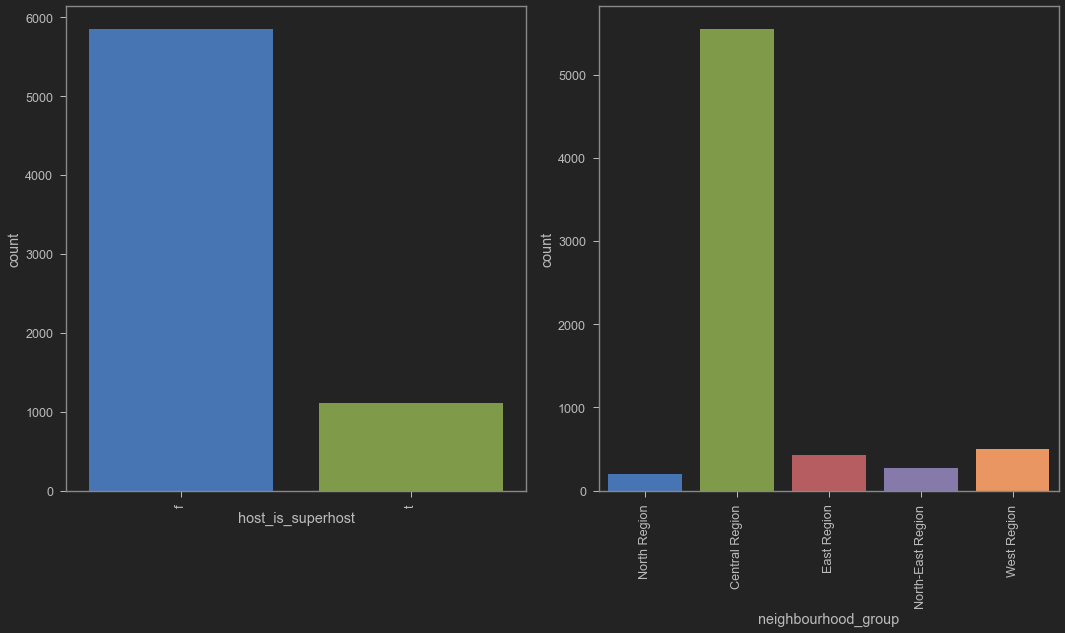

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,9))
for variable, subplot in zip(['host_is_superhost', 'neighbourhood_group'], ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        plt.tight_layout()

# plt.savefig('Categorical.png')

Ternyata status host yang bukan superhost lebih banyak dibandingkan yang bukan superhost. Status superhost ini adalah seperti reward yang diberikan oleh airbnb terhadap host yang mendapat penilaian terbaik. Kriteria penilaian kemungkinan dari segi pendapatan, rating atau semacamnya. (asumsi)

## Neighbourhood

In [20]:
data.neighbourhood.nunique()

41

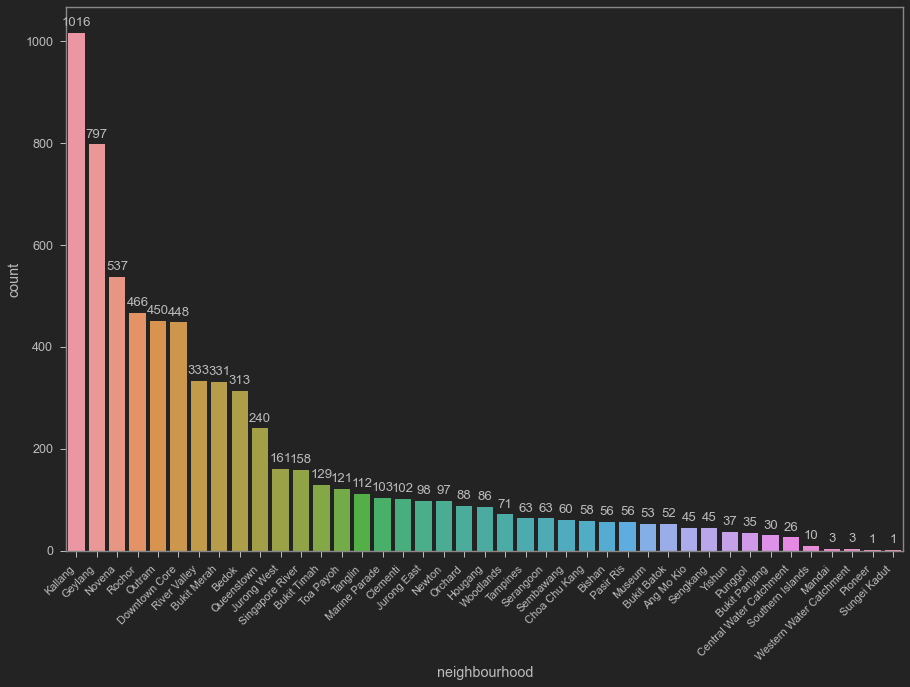

In [18]:
plt.figure(figsize=(15,10))
a= sns.countplot(data=data,x='neighbourhood',order = data['neighbourhood'].value_counts().index)
for p in a.patches:
    a.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small' )
plt.show()

In [15]:
data.neighbourhood.value_counts().head(10)

Kallang          1016
Geylang           797
Novena            537
Rochor            466
Outram            450
Downtown Core     448
River Valley      333
Bukit Merah       331
Bedok             313
Queenstown        240
Name: neighbourhood, dtype: int64

Distrik Singapur dengan 5 jumlah listing Airbnb terbanyak di singapur berada di Distrik Kallang, Geylang, Novena dan Outram.

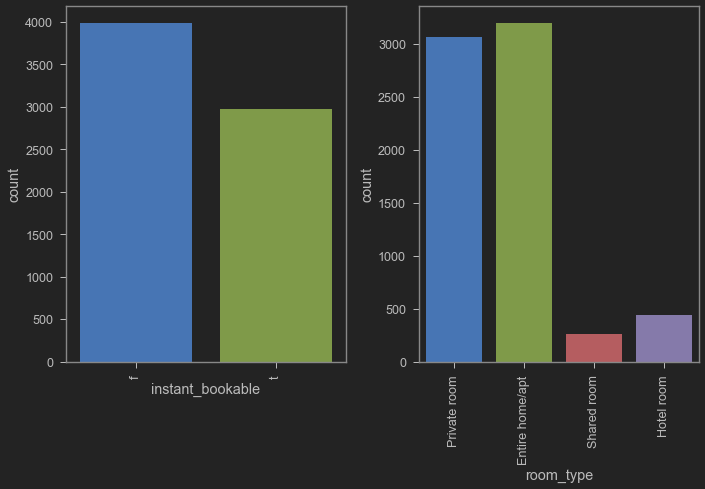

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
for variable, subplot in zip(['instant_bookable','room_type'], ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        plt.tight_layout()

# plt.savefig('Categorical.png')

- Dari total listing airbnb singapore, ternyata lebih banyak listing yang membutuhkan persetujuan pembookingan terhadap host listing dibandingkan yang dapat memesan secara langsung

- Room type yang tersedia di airbnb di dominasi oleh penyewaan rumah atau apartemen dan ruangan privasi seperti rumah di perumahan yang tidak ada sharing dengan penghuni lain atau semacamnya. Para penyewa lokal ataupun turis juga pasti cenderung ingin menginap dengan tenang tanpa adanya gangguan orang lain. Beberapa ada yang berupa shared room, kemungkinan adalah untuk para backpacker, cheap traveller, hotel kapsul. Singapur adalah negara dengan biaya hidup yang tinggi, pusat perbelanjaan, tidak ada banyak lokasi wisata untuk para backpacker, sehingga penyewaan yang disediakan buat backpacker juga tidak terlalu banyak.

## Property Type

In [21]:
data.property_type.value_counts().head(10)

Apartment             2751
Condominium           2055
Serviced apartment     589
House                  479
Hostel                 312
Boutique hotel         151
Hotel                  143
Townhouse              109
Loft                    99
Bed and breakfast       76
Name: property_type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

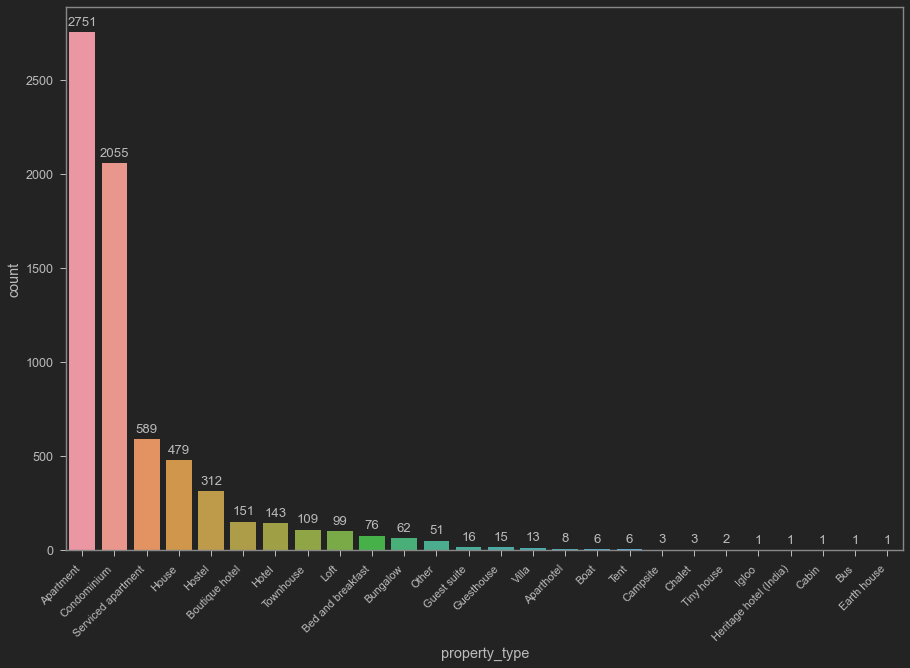

In [14]:
plt.figure(figsize=(15,10))
a= sns.countplot(data=data, x='property_type',order = data['property_type'].value_counts().index)

for p in a.patches:
    a.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small' )

Dari tipe property yang paling banyak disewakan adalah tipe apartemen, kemudian diikuti oleh condo, serviced apartment, rumah. Para host dan penyewa sekarang lebih mengutamakan kemudahan dalam menginap dan menyewakan penginapan. salah satu yang termudah adalah dengan menyewakan apartemen. Biaya memiliki apartmen termasuk terjangkau dari segi finansial dibandingkan dengan memiliki rumah yang kosong atau properti lain untuk disewakan

## BIVARIATE

In [15]:
categorical_feature

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'host_is_superhost',
 'property_type',
 'instant_bookable']

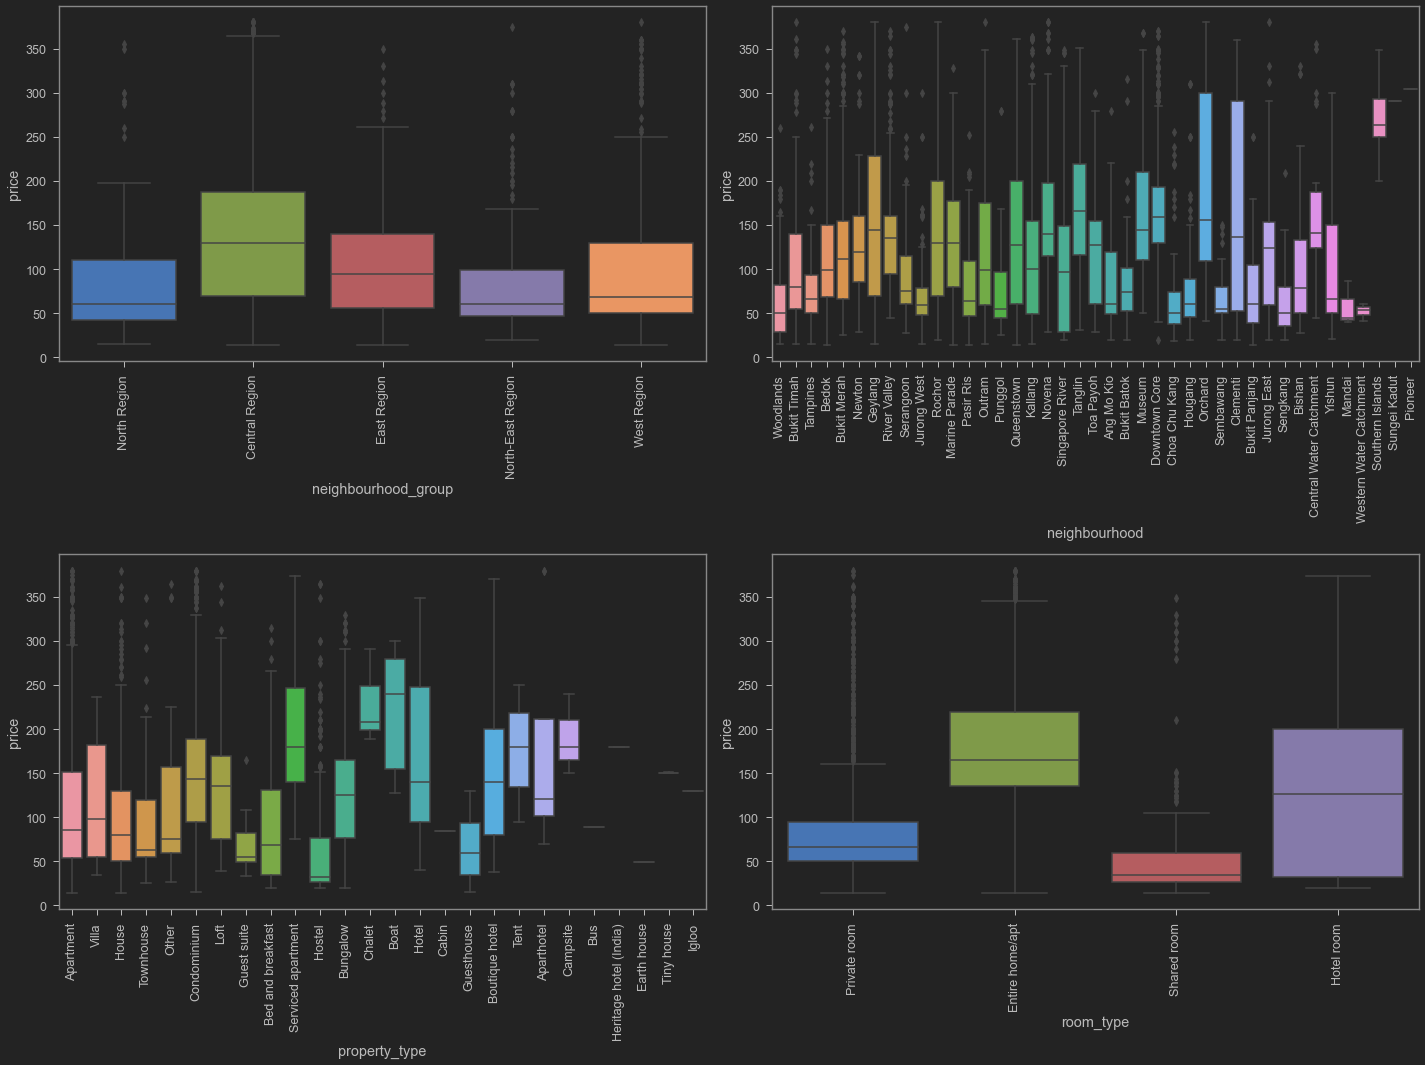

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for var, subplot in zip(['neighbourhood_group',
                         'neighbourhood',
                         'property_type',
                         'room_type'], ax.flatten()):
    sns.boxplot(x=var, y='price', data=data, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
# plt.savefig('CategoricalvsPrice.png')

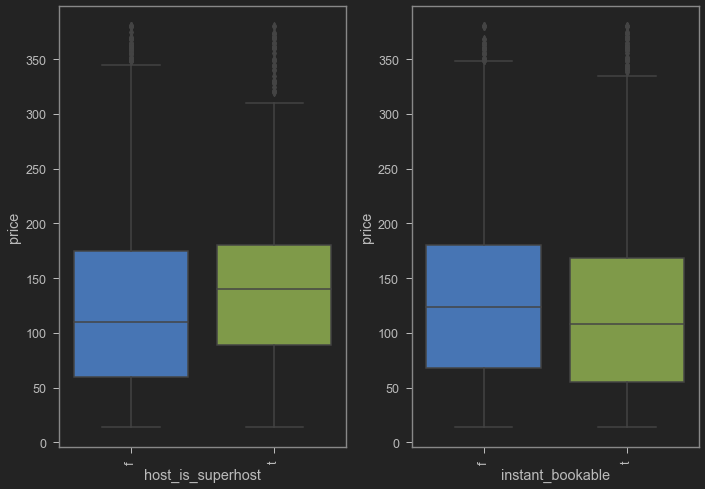

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
for var, subplot in zip(['host_is_superhost',                         
                         'instant_bookable'], ax.flatten()):
    sns.boxplot(x=var, y='price', data=data, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        plt.tight_layout()

# plt.savefig('CategoricalvsPrice.png')

- Dari analisis boxplot, adanya pengaruh dari lokasi (neighbourhood dan neigbourhood group), tipe ruangan, dan jenis property yang disewakan terhadap harga.
- Posisi central memiliki distribusi harga tertinggi


In [25]:
properti = data.groupby(['neighbourhood_group', 'room_type']).size()

In [26]:
properti

neighbourhood_group  room_type      
Central Region       Entire home/apt    2880
                     Hotel room          427
                     Private room       2030
                     Shared room         208
East Region          Entire home/apt      96
                     Hotel room            3
                     Private room        325
                     Shared room           8
North Region         Entire home/apt      35
                     Private room        148
                     Shared room          15
North-East Region    Entire home/apt      48
                     Hotel room            3
                     Private room        216
                     Shared room           7
West Region          Entire home/apt     134
                     Hotel room            3
                     Private room        346
                     Shared room          22
dtype: int64

Dapat dilihat dari penyebaran tipe properti terhadap Pembagian wilayah Singapur. Penyewaan properti berbagai tipe terpusat di Regional pusat daerah Singapur. Tipe properti dengan jumlah paling sedikit adalah Hotel Room. Hal ini juga disebabkan karena perijinan untuk menyewakan tipe hotel baru berlaku pada tahun 2018

# NUMERICAL FEATURES

In [18]:
numerical_feature = [
    feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical feature:', len(numerical_feature))

data[numerical_feature].head()  # mengeluarkan lima data teratas

Number of numerical feature: 18


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities
0,49091,266763,1.44255,103.79580,84,180,1,0.01,2,365,1.0,1.0,1,94.0,1.0,0.0,0.0,8
1,50646,227796,1.33235,103.78521,80,90,18,0.24,1,365,1.0,1.0,2,91.0,1.0,0.0,0.0,12
2,56334,266763,1.44246,103.79667,70,6,20,0.18,2,365,1.0,1.0,1,98.0,1.0,0.0,0.0,9
3,71609,367042,1.34541,103.95712,167,90,20,0.19,8,365,2.0,3.0,4,89.0,1.0,279.0,56.0,27
4,71896,367042,1.34567,103.95963,95,90,24,0.22,8,365,1.0,1.0,1,83.0,0.5,139.0,28.0,24


In [19]:
numerical_feature

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'bedrooms',
 'beds',
 'guests_included',
 'review_scores_rating',
 'bathrooms',
 'security_deposit',
 'cleaning_fee',
 'len_amenities']

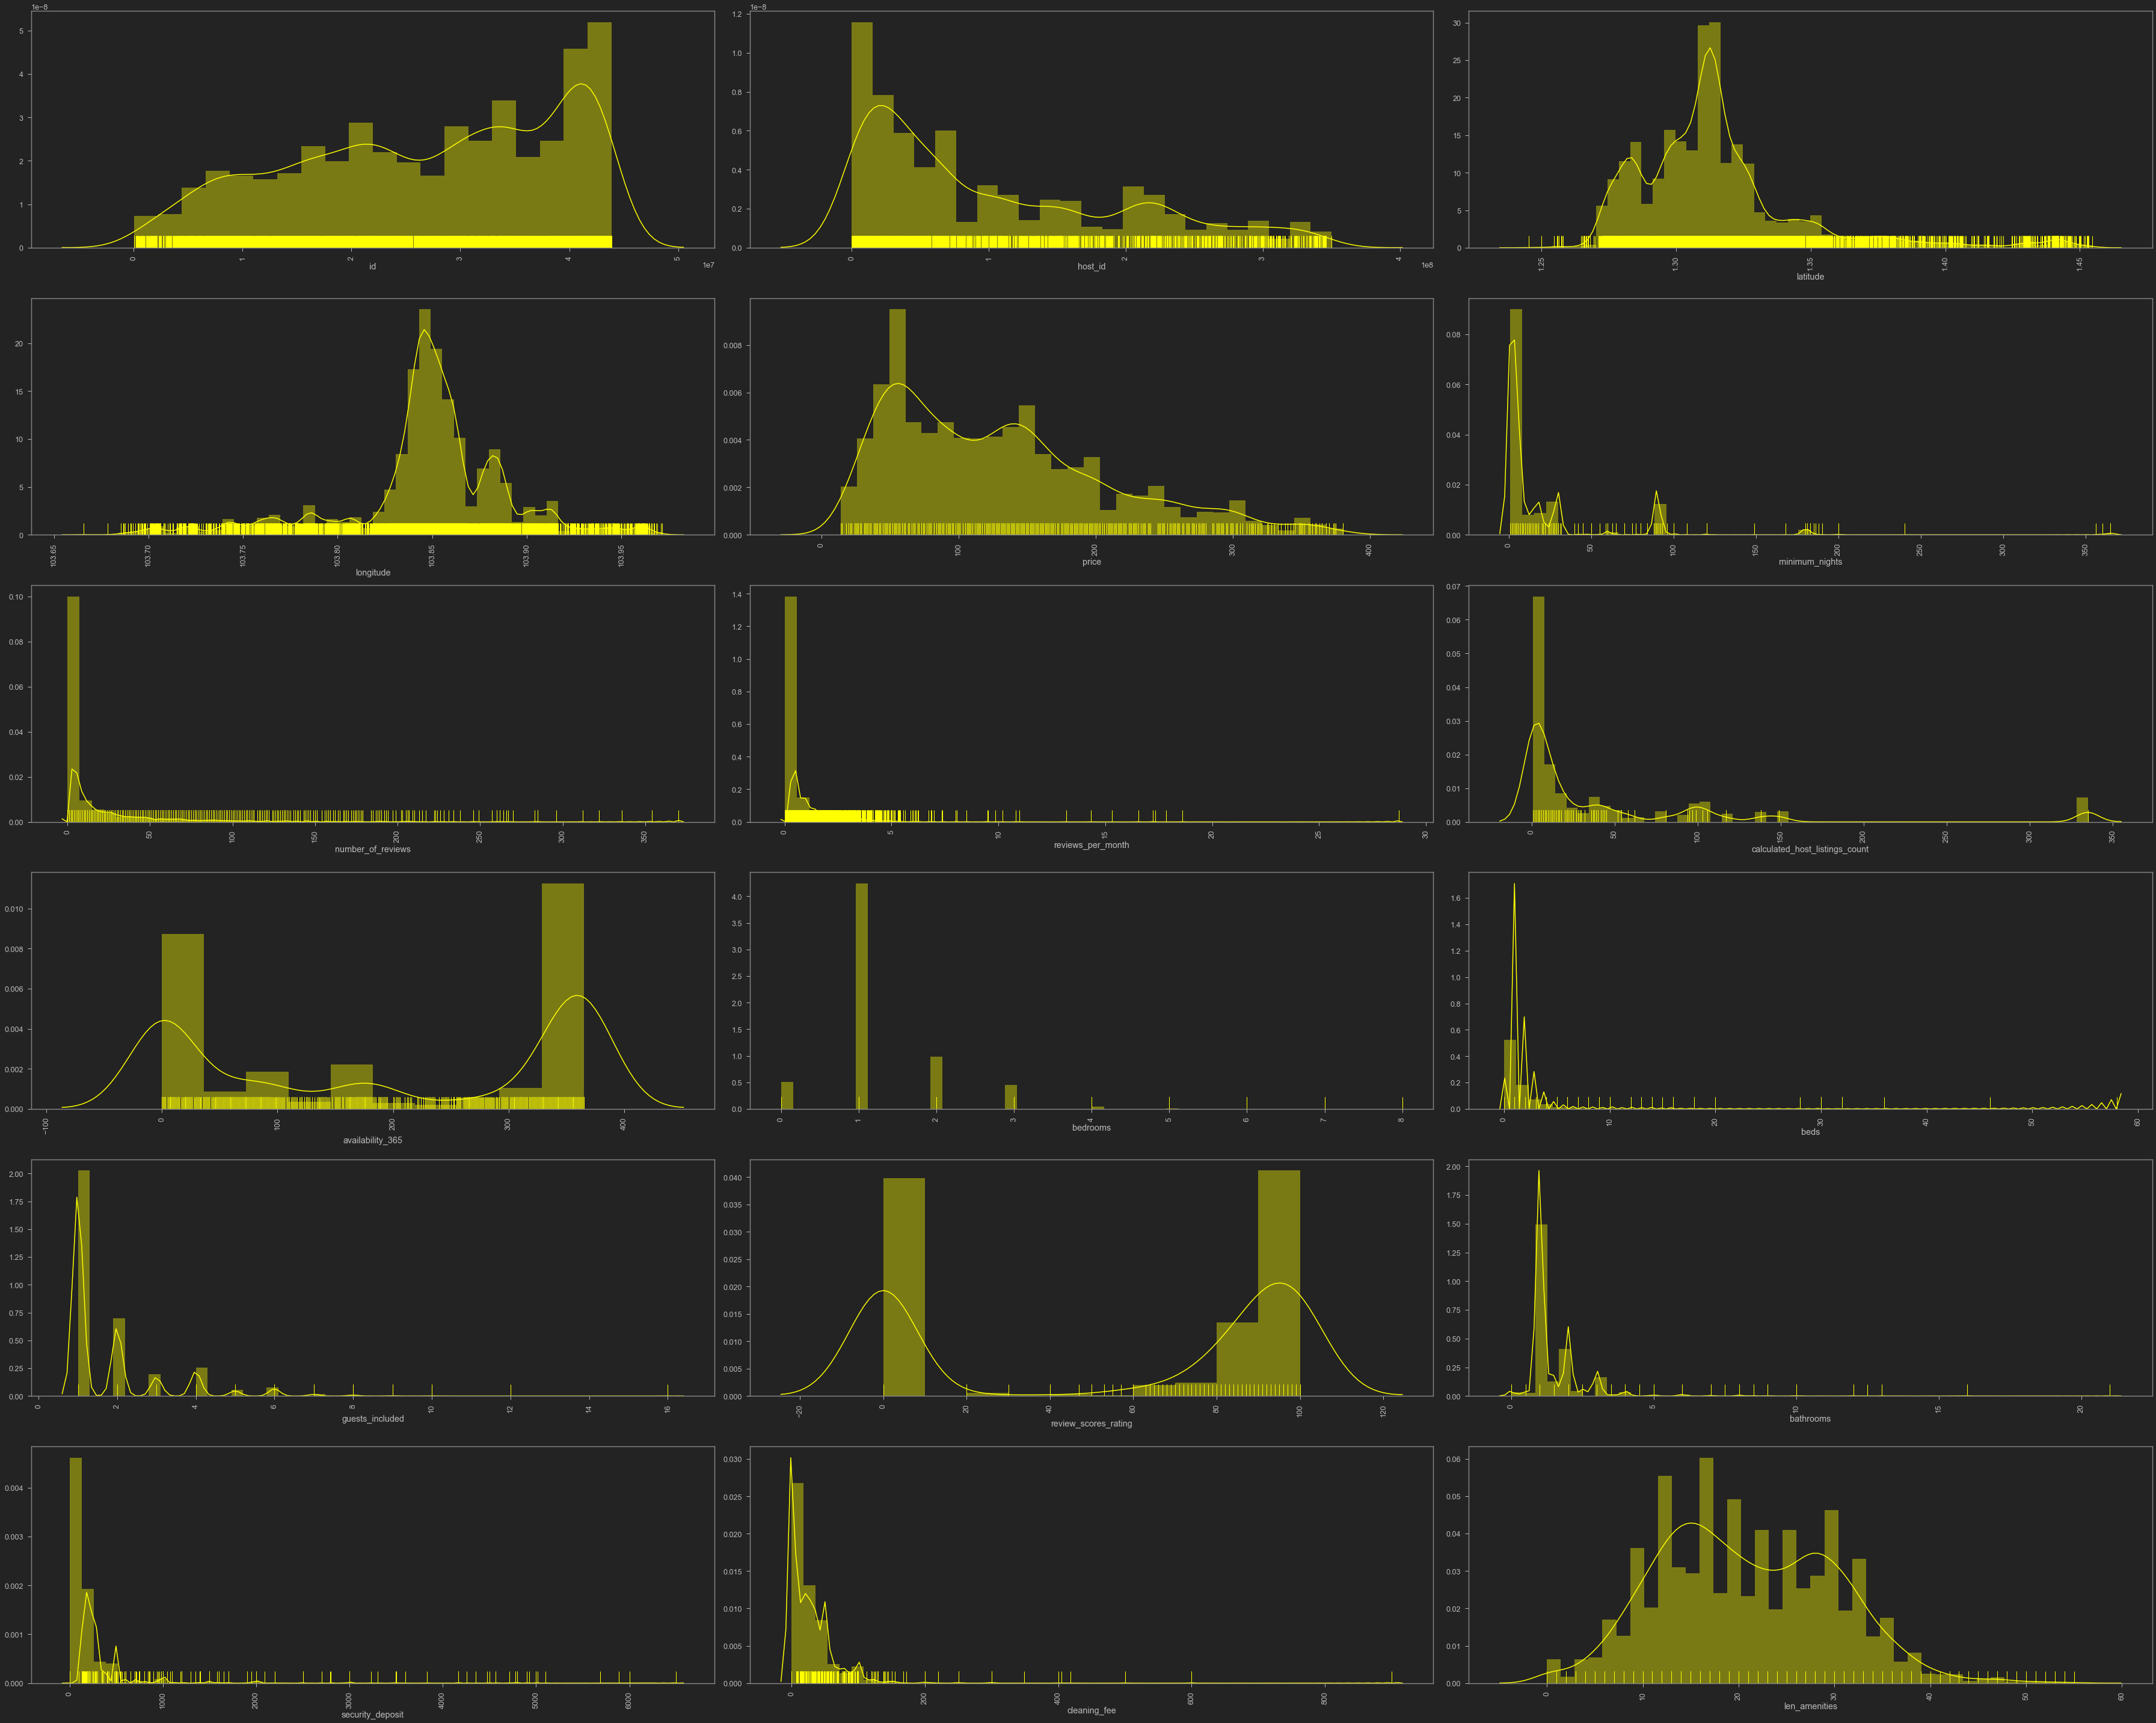

In [20]:
fig, ax = plt.subplots(6, 3, figsize=(50, 40))
for variable, subplot in zip(['id',
                              'host_id',
                              'latitude',
                              'longitude',
                              'price',
                              'minimum_nights',
                              'number_of_reviews',
                              'reviews_per_month',
                              'calculated_host_listings_count',
                              'availability_365',
                              'bedrooms',
                              'beds',
                              'guests_included',
                              'review_scores_rating',
                              'bathrooms',
                              'security_deposit',
                              'cleaning_fee',
                              'len_amenities'], ax.flatten()):
    sns.distplot(data[variable], rug=True, ax=subplot,color='yellow')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
# plt.savefig('Numerical.png') #save figure kedalam png

Dari plot histogram diatas, terlihat distribusi data sudah beberapa yang membaik dibandingkan awal. Untuk membuat seluruh data menjadi distribusi normal, saya akan mengubah skala menjadi logaritmic scale.

## Bivariate

In [21]:
numerical_feature

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'bedrooms',
 'beds',
 'guests_included',
 'review_scores_rating',
 'bathrooms',
 'security_deposit',
 'cleaning_fee',
 'len_amenities']

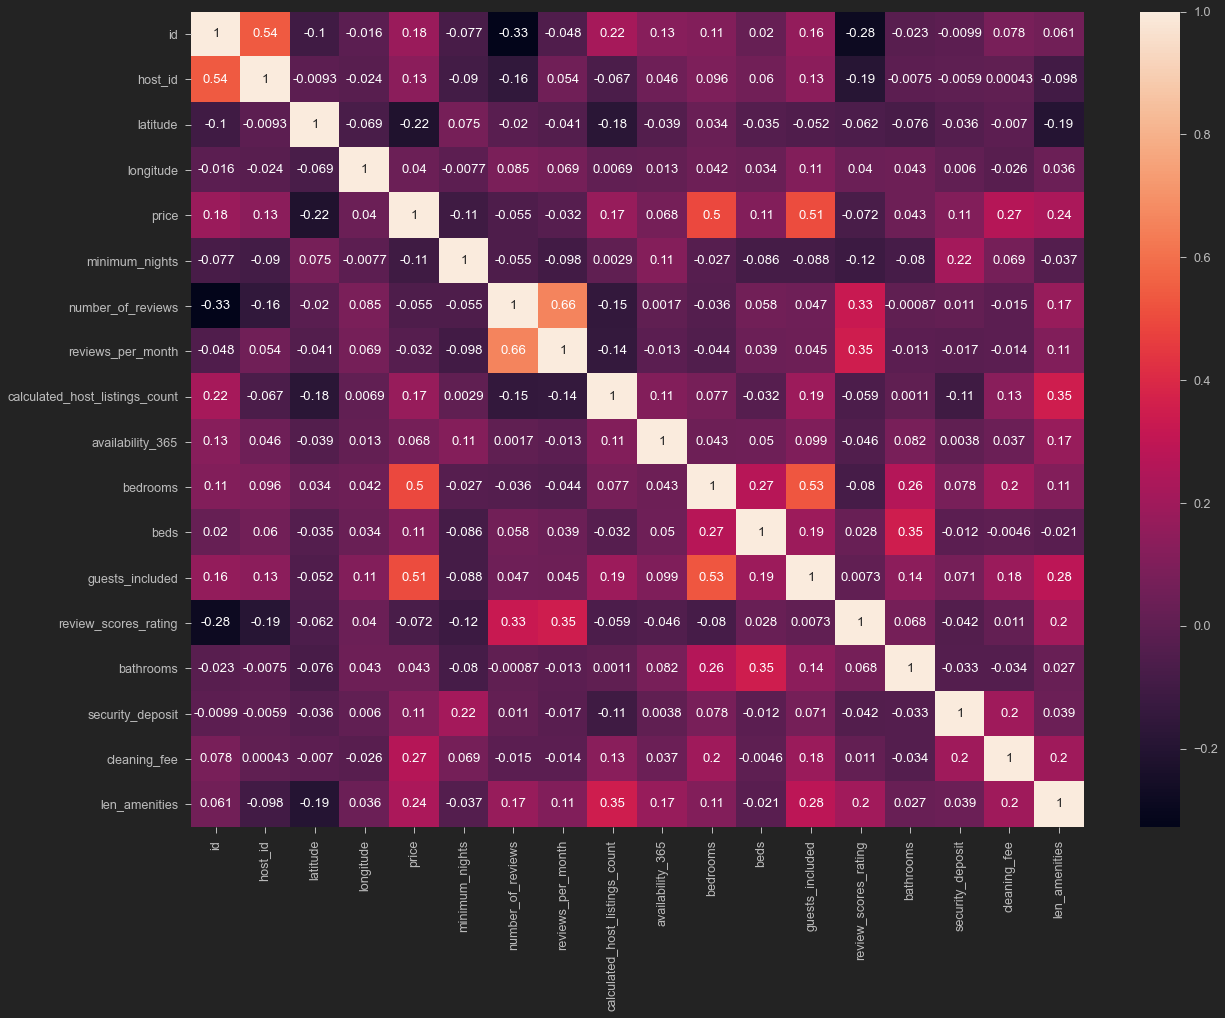

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

In [23]:
num_top10_corr = data.corr()['price'].sort_values(ascending=False).head(30).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
s = num_top10_corr.style.background_gradient(cmap=cm)
s

,price
price,1.000000
guests_included,0.507316
bedrooms,0.496687
cleaning_fee,0.268044
len_amenities,0.235254
id,0.184855
calculated_host_listings_count,0.171853
host_id,0.134752
beds,0.110667
security_deposit,0.110573


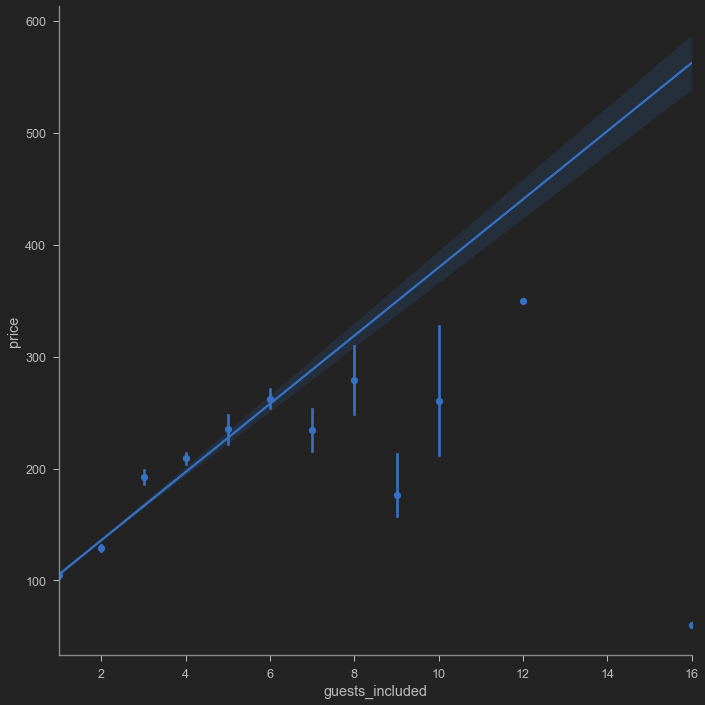

In [24]:
sns.lmplot(x="guests_included", y="price", data=data, x_estimator=np.mean,size=10);
# plt.savefig('Guest Included vs Price.png')

terlihat bahwa korelasi dimana batas tamu yang diizinkan sangat mempengaruhi tinggi harga. semakin banyak tamu, ruang tidur dan tempat tidur juga berhubungan.

# Airbnb distribution location

## Neighborhood

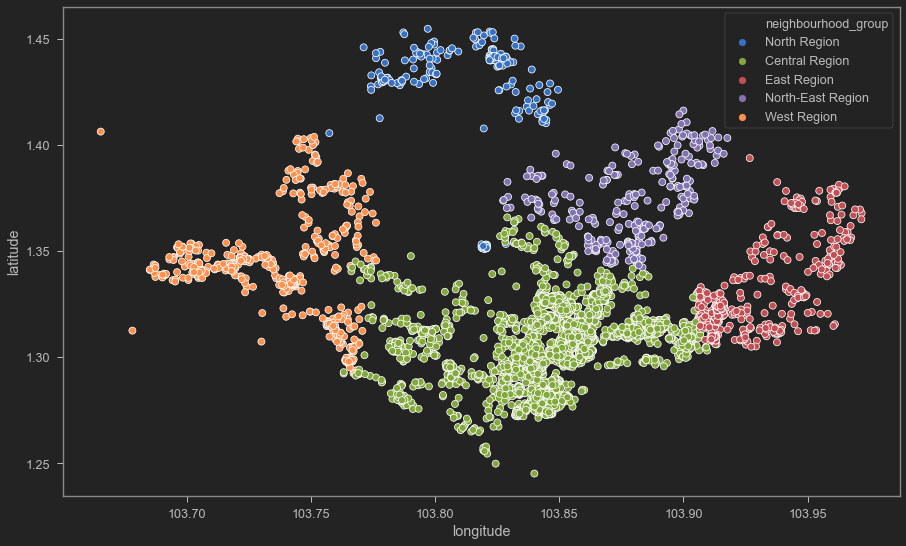

In [25]:
plt.figure(figsize=(15,9))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

## By price

In [27]:
def price_class(col):
    if col<100:
        return '<100'
    elif (col>=100) and (col<200):
        return '100-200'
    elif (col>=200) and (col<300):
        return '200-300'
    elif col>=300:
        return '>300'

In [27]:
distribution = data[['id','latitude','longitude','price']]

In [28]:
additional = data1[['id','name']]

In [29]:
distribution=pd.merge(distribution, additional, how='left')

In [30]:
distribution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 0 to 6953
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6954 non-null   int64  
 1   latitude   6954 non-null   float64
 2   longitude  6954 non-null   float64
 3   price      6954 non-null   int64  
 4   name       6954 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 326.0+ KB


In [31]:
distribution['price_class']=distribution['price'].apply(price_class)

In [32]:
distribution.head()

,id,latitude,longitude,price,name,price_class
0,49091,1.44255,103.79580,84,COZICOMFORT LONG TERM STAY ROOM 2,<100
1,50646,1.33235,103.78521,80,Pleasant Room along Bukit Timah,<100
2,56334,1.44246,103.79667,70,COZICOMFORT,<100
3,71609,1.34541,103.95712,167,Ensuite Room (Room 1 & 2) near EXPO,100-200
4,71896,1.34567,103.95963,95,B&B Room 1 near Airport & EXPO,<100


Text(0.5, 1.0, 'Countplot')

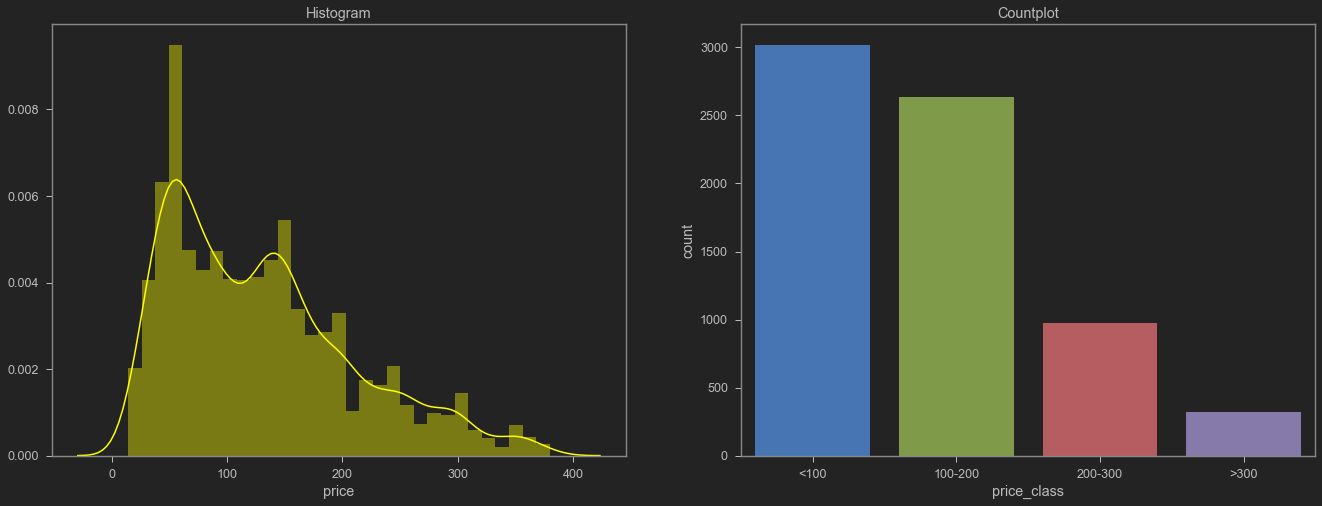

In [33]:
fig = plt.figure(figsize = (35,27))
ax0 = fig.add_subplot(331) 
ax1 = fig.add_subplot(332) 


# Subplot 1:
sns.distplot(distribution['price'],color='yellow',ax=ax0)
ax0.set_title('Histogram')


# Subplot 2:
sns.countplot(distribution['price_class'], order=['<100','100-200','200-300','>300'])
ax1.set_title('Countplot')


Persebaran Data masih menunjukkan positive skewness. Data tersebut akan di transform agar terdistribusi normal

In [34]:
import matplotlib.image as mpimg

In [35]:
plot=distribution[['latitude','longitude','price_class']]

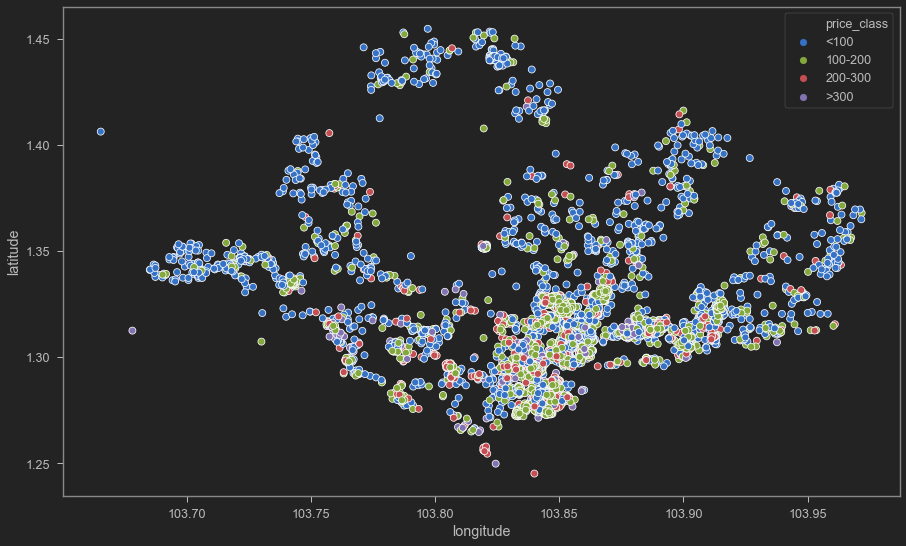

In [36]:
plt.figure(figsize=(15,9))
sns.scatterplot(plot.longitude,plot.latitude,hue=plot.price_class)
plt.ioff()

In [37]:
import folium
from folium.plugins import HeatMap
m = folium.Map([1.4123,103.77777],zoom_start=11,tiles='CartoDB dark_matter')
HeatMap(data[['latitude', 'longitude']].dropna(), radius=8, gradient={
        0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1.0: 'red'}).add_to(m)
display(m)

Distribusi penyewaan Airbnb terpusat di daerah Regional pusat (Central Region). Singapore Central Region merupakan pusat ekonomi, wisata dan icon Singapore (Merlion Statue), Universal Studio.

- src : https://www.propertyguru.com.sg/property-guides/ccr-ocr-rcr-region-singapore-ura-map-21045


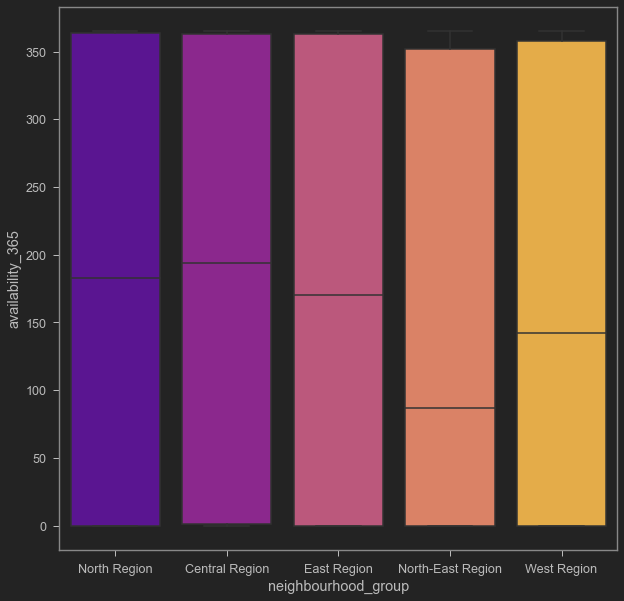

In [38]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='plasma')

# Rating

In [39]:
rating=data2[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
              'review_scores_communication','review_scores_location','review_scores_value']]
rating.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,94.0,10.0,10.0,10.0,10.0,8.0,8.0
1,91.0,9.0,10.0,10.0,10.0,9.0,9.0
2,98.0,10.0,10.0,10.0,10.0,8.0,9.0
3,89.0,9.0,8.0,9.0,10.0,9.0,9.0
4,83.0,8.0,8.0,9.0,9.0,8.0,8.0


In [40]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         4354 non-null   float64
 1   review_scores_accuracy       4349 non-null   float64
 2   review_scores_cleanliness    4351 non-null   float64
 3   review_scores_checkin        4345 non-null   float64
 4   review_scores_communication  4349 non-null   float64
 5   review_scores_location       4344 non-null   float64
 6   review_scores_value          4345 non-null   float64
dtypes: float64(7)
memory usage: 400.6 KB


In [41]:
num_top10_corr = rating.corr()['review_scores_rating'].sort_values(ascending=False).head(30).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
s = num_top10_corr.style.background_gradient(cmap=cm)
s

,review_scores_rating
review_scores_rating,1.000000
review_scores_accuracy,0.819232
review_scores_value,0.798908
review_scores_cleanliness,0.766713
review_scores_communication,0.749118
review_scores_checkin,0.686448
review_scores_location,0.613084


- Dari data diatas, semua kategori review memiliki korelasi baik terhadap rating secara keseluruhan. Korelasi terendah adalah review lokasi. Kondisi ini masih masuk akal karena kebanyakan penyewa sudah tau posisi tempat yang akan disewa mereka. Properti yang disewakan jauh dari tempat wisata, tempat berbelanja atau pusat kota kemungkinan besar mendapatkan review yang buruk. Tetapi kondisi tersebut juga biasanya disesuaikan dengan harga yang diberikan
- Faktor kebersihan, respon pemesanan dari host, kemudahan untuk checkin dan checkout tentu akan menjadi yang utama. Kebanyakan pelanggan mau mendapatkan feedback yang sepadan dengan harga yang dibayar. Prinsip utama untuk host airbnb adalah Tamu adalah Raja.

# AirBnB Top Performer and Low Performer


In [42]:
host = data2[['id','host_id','host_name','host_since','host_location','host_response_time','host_response_rate',
            'host_is_superhost','instant_bookable','calculated_host_listings_count','host_identity_verified']]

In [43]:
host.head()

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,instant_bookable,calculated_host_listings_count,host_identity_verified
0,49091,266763,Francesca,2010-10-20,singapore,within an hour,100%,f,f,2,f
1,50646,227796,Sujatha,2010-09-08,"Singapore, Singapore",NaN,NaN,f,f,1,f
2,56334,266763,Francesca,2010-10-20,singapore,within an hour,100%,f,f,2,f
3,71609,367042,Belinda,2011-01-29,Singapore,within an hour,100%,f,t,8,t
4,71896,367042,Belinda,2011-01-29,Singapore,within an hour,100%,f,t,8,t


In [44]:
host.isna().sum()

id                                   0
host_id                              0
host_name                           22
host_since                          22
host_location                       41
host_response_time                1693
host_response_rate                1693
host_is_superhost                   22
instant_bookable                     0
calculated_host_listings_count       0
host_identity_verified              22
dtype: int64

In [46]:
host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              7323 non-null   int64 
 1   host_id                         7323 non-null   int64 
 2   host_name                       7301 non-null   object
 3   host_since                      7301 non-null   object
 4   host_location                   7282 non-null   object
 5   host_response_time              5630 non-null   object
 6   host_response_rate              5630 non-null   object
 7   host_is_superhost               7301 non-null   object
 8   instant_bookable                7323 non-null   object
 9   calculated_host_listings_count  7323 non-null   int64 
 10  host_identity_verified          7301 non-null   object
dtypes: int64(3), object(8)
memory usage: 629.4+ KB


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 0 to 7322
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6954 non-null   int64  
 1   name                            6954 non-null   object 
 2   host_id                         6954 non-null   int64  
 3   host_name                       6954 non-null   object 
 4   neighbourhood_group             6954 non-null   object 
 5   neighbourhood                   6954 non-null   object 
 6   latitude                        6954 non-null   float64
 7   longitude                       6954 non-null   float64
 8   room_type                       6954 non-null   object 
 9   price                           6954 non-null   int64  
 10  minimum_nights                  6954 non-null   int64  
 11  number_of_reviews               6954 non-null   int64  
 12  reviews_per_month               69

In [47]:
an_host = pd.merge(data, host, how='inner')

In [48]:
an_host.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6949 entries, 0 to 6948
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6949 non-null   int64  
 1   name                            6949 non-null   object 
 2   host_id                         6949 non-null   int64  
 3   host_name                       6949 non-null   object 
 4   neighbourhood_group             6949 non-null   object 
 5   neighbourhood                   6949 non-null   object 
 6   latitude                        6949 non-null   float64
 7   longitude                       6949 non-null   float64
 8   room_type                       6949 non-null   object 
 9   price                           6949 non-null   int64  
 10  minimum_nights                  6949 non-null   int64  
 11  number_of_reviews               6949 non-null   int64  
 12  reviews_per_month               69

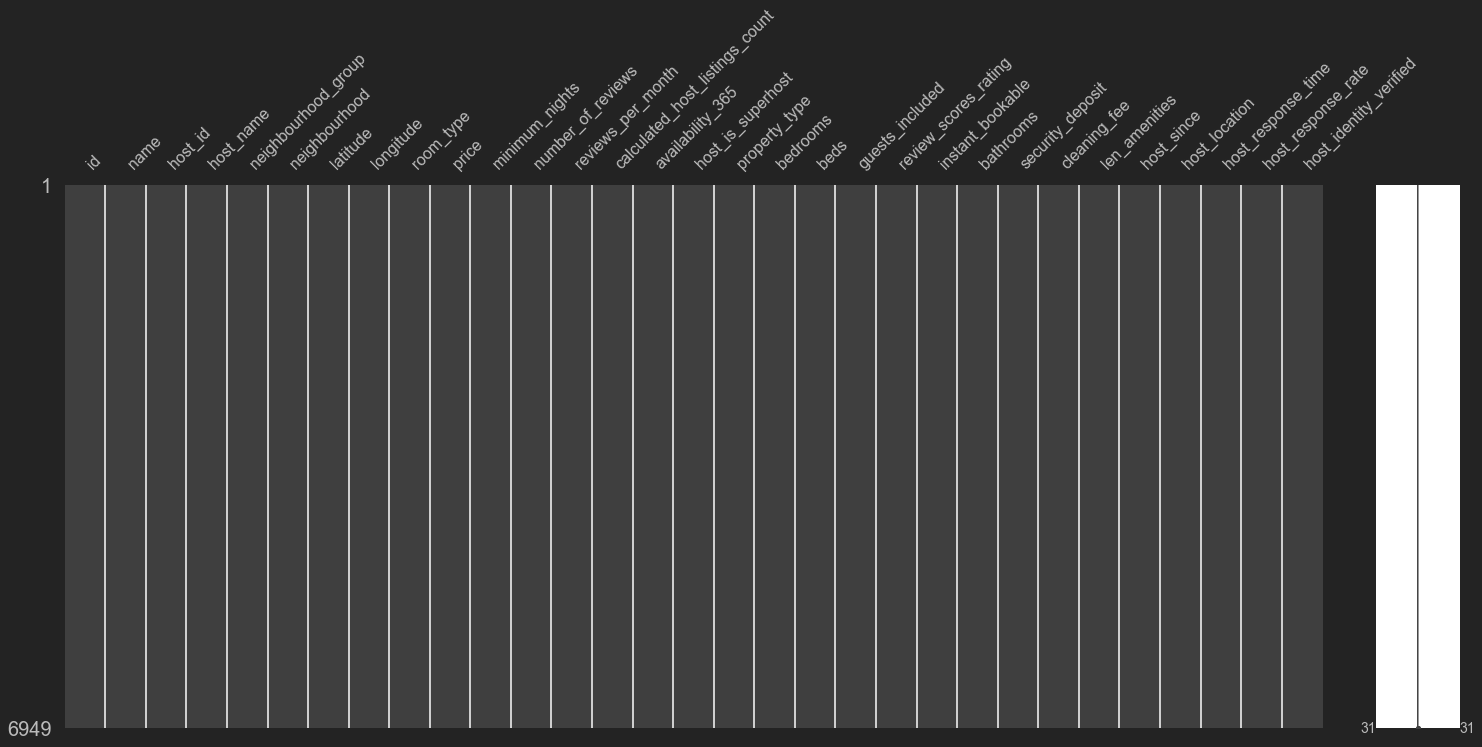

In [53]:
import missingno as msno
msno.matrix(an_host)

- Untuk kasus ini, saya akan fillna dengan menggunakan most frequent data (mode), karena kurangnya informasi terkait.

In [50]:
an_host['host_response_time'].fillna(an_host['host_response_time'].mode()[0], inplace=True)
an_host['host_response_rate'].fillna(an_host['host_response_rate'].mode()[0], inplace=True)
an_host['host_location'].fillna(an_host['host_location'].mode()[0], inplace=True)

In [52]:
an_host.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
host_is_superhost                 0
property_type                     0
bedrooms                          0
beds                              0
guests_included                   0
review_scores_rating              0
instant_bookable                  0
bathrooms                         0
security_deposit                  0
cleaning_fee                      0
len_amenities                     0
host_since                        0
host_location               

## Score

In [54]:
an_host['score']=an_host['reviews_per_month']*an_host['review_scores_rating']

In [58]:
an_host.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_is_superhost,property_type,bedrooms,beds,guests_included,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,len_amenities,host_since,host_location,host_response_time,host_response_rate,host_identity_verified,score
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,0.01,2,365,f,Apartment,1.0,1.0,1,94.0,f,1.0,0.0,0.0,8,2010-10-20,singapore,within an hour,100%,f,0.94
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,0.24,1,365,f,Apartment,1.0,1.0,2,91.0,f,1.0,0.0,0.0,12,2010-09-08,"Singapore, Singapore",within an hour,100%,f,21.84
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,0.18,2,365,f,Apartment,1.0,1.0,1,98.0,f,1.0,0.0,0.0,9,2010-10-20,singapore,within an hour,100%,f,17.64
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,167,90,20,0.19,8,365,f,Villa,2.0,3.0,4,89.0,t,1.0,279.0,56.0,27,2011-01-29,Singapore,within an hour,100%,t,16.91
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,95,90,24,0.22,8,365,f,House,1.0,1.0,1,83.0,t,0.5,139.0,28.0,24,2011-01-29,Singapore,within an hour,100%,t,18.26


In [59]:
an_host['score'].isna().sum()

0

In [61]:
an_host['score'].describe()

count    6949.000000
mean       43.549626
std       105.207903
min         0.000000
25%         0.000000
50%         7.200000
75%        38.130000
max      2728.400000
Name: score, dtype: float64

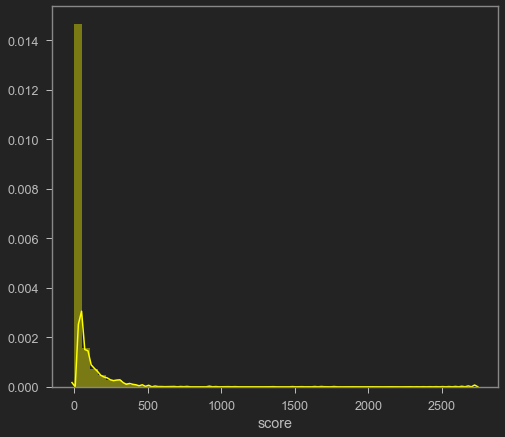

In [68]:
sns.distplot(an_host['score'],color='yellow')

- Dari grafik distribusi data score diatas, sebagian besar dari listing (penyewa) adalah " **_Low Performer/Earner_** "
- saya akan membagi menjadi tiga kelompok berdasarkan _performance score_

In [69]:
an_host['score_class'] = an_host['score'].apply(lambda x: 'low earner' if x <= 74 else
                                                'medium earner' if x > 74 and x <= 200 else
                                                'top earner' if x > 200 else 'no')

In [70]:
an_host['score_class'].value_counts()

low earner       5813
medium earner     731
top earner        405
Name: score_class, dtype: int64

In [71]:
num_top10_corr = an_host.corr()['score'].sort_values(ascending=False).head(30).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
s = num_top10_corr.style.background_gradient(cmap=cm)
s

,score
score,1.000000
reviews_per_month,0.998731
number_of_reviews,0.651980
review_scores_rating,0.351221
len_amenities,0.108286
longitude,0.067537
host_id,0.054191
guests_included,0.041702
beds,0.032159
cleaning_fee,-0.010427


Korelasi antar fitur dengan score tidak menunjukkan korelasi yang baik kecuali reviews karena parameter score didapat dari kalkulasi dari parameter-parameter tersebut.
Pastikan untuk mendapatkan review dari para penyewa untuk mendapatkan reputasi dan score yang baik (parameter untuk host)




In [74]:
an_host['host_since']=pd.to_datetime(an_host['host_since'])

In [75]:
an_host['host_since'][0].year

2010

Terhitung dari awal tahun 2010

In [76]:
an_host['host_since_year']=an_host['host_since'].apply(lambda x:x.year)

In [77]:
an_host.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
host_is_superhost                 0
property_type                     0
bedrooms                          0
beds                              0
guests_included                   0
review_scores_rating              0
instant_bookable                  0
bathrooms                         0
security_deposit                  0
cleaning_fee                      0
len_amenities                     0
host_since                        0
host_location               

In [78]:
an_host = an_host.drop(columns='host_since',axis= 1)

In [79]:
an_host.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_is_superhost,property_type,bedrooms,beds,guests_included,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,len_amenities,host_location,host_response_time,host_response_rate,host_identity_verified,score,score_class,host_since_year
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,0.01,2,365,f,Apartment,1.0,1.0,1,94.0,f,1.0,0.0,0.0,8,singapore,within an hour,100%,f,0.94,low earner,2010
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,0.24,1,365,f,Apartment,1.0,1.0,2,91.0,f,1.0,0.0,0.0,12,"Singapore, Singapore",within an hour,100%,f,21.84,low earner,2010
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,0.18,2,365,f,Apartment,1.0,1.0,1,98.0,f,1.0,0.0,0.0,9,singapore,within an hour,100%,f,17.64,low earner,2010
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,167,90,20,0.19,8,365,f,Villa,2.0,3.0,4,89.0,t,1.0,279.0,56.0,27,Singapore,within an hour,100%,t,16.91,low earner,2011
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,95,90,24,0.22,8,365,f,House,1.0,1.0,1,83.0,t,0.5,139.0,28.0,24,Singapore,within an hour,100%,t,18.26,low earner,2011


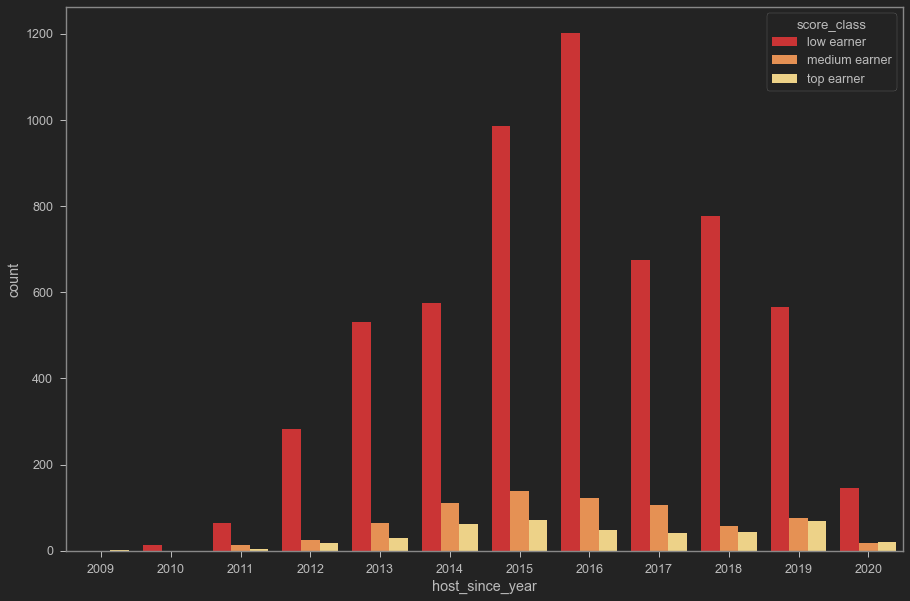

In [85]:
plt.figure(figsize=(15,10))
a = sns.countplot(an_host['host_since_year'], hue=an_host['score_class'],palette='YlOrRd_r')

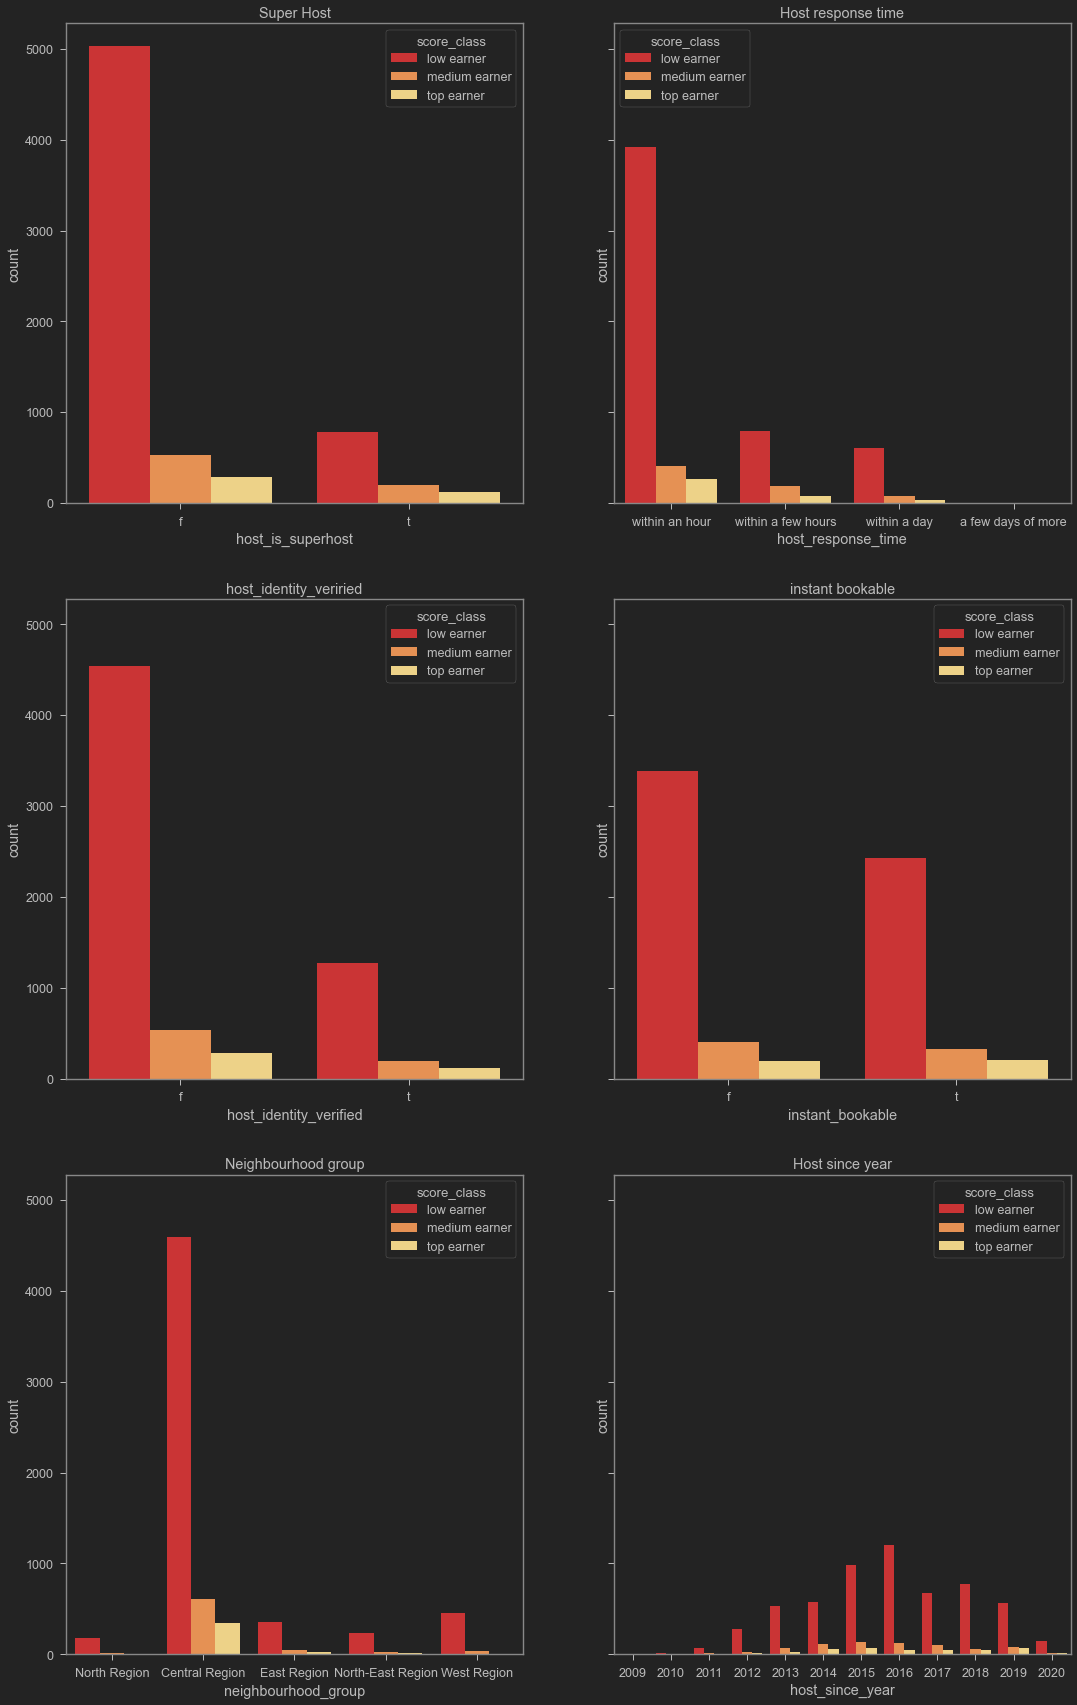

In [92]:
f, (ax1, ax2, ax3) = plt.subplots(3, 2, sharey=True, figsize=(18, 30))

ax1[0].set_title('Super Host')
sns.countplot(an_host['host_is_superhost'],
              hue=an_host['score_class'], ax=ax1[0], palette='YlOrRd_r')

ax1[1].set_title('Host response time')
sns.countplot(an_host['host_response_time'], hue=an_host['score_class'], ax=ax1[1], order=['within an hour', 'within a few hours',
                                                                                           'within a day', 'a few days of more'], palette='YlOrRd_r')

ax2[0].set_title('host_identity_veriried')
sns.countplot(an_host['host_identity_verified'],
              hue=an_host['score_class'], ax=ax2[0], palette='YlOrRd_r')

ax2[1].set_title('instant bookable')
sns.countplot(an_host['instant_bookable'],
              hue=an_host['score_class'], ax=ax2[1], palette='YlOrRd_r')

ax3[0].set_title('Neighbourhood group')
sns.countplot(an_host['neighbourhood_group'],
              hue=an_host['score_class'], ax=ax3[0], palette='YlOrRd_r')

ax3[1].set_title('Host since year')
sns.countplot(an_host['host_since_year'],
              hue=an_host['score_class'], ax=ax3[1], palette='YlOrRd_r')
plt.savefig('topVSlow.png', bbox_inches='tight')

Dari barplot diatas, beberapa yang dapat saya sarankan untuk para host yang ingin mendapatkan keuntungan bagus dari Airbnb:
1. Status Superhost yang didapatkan sebagai reward dari airbnb dapat menaikkan pendapatan secara signifikan. Jika ingin menyewakan properti, sebaiknya secara konsisten mendapatkan rating dan review yang bagus.
2. Cara booking secara instan sangat mempengaruhi penilaian sebagai good earner atau tidak.
3. Jika ingin memulai bisnis airbnb, pemilihan lokasi sudah jadi faktor utama. Karena Singapur merupakan negara kecil dan pusat ekonomi juga berada di regional pusat, maka lokasi Central Region menjadi pilihan utama. 
4. Jika ingin memulai bisnis sebagai host airbnb, bisa dimulai kapan saja. Karena dilihat secara visual menjadi host sejak berapa tahun ke belakang tidak ada pengaruh yang signifikan

# Dominant Host Singapore 

In [94]:
host_start = data2[['host_id','host_name','host_since','host_total_listings_count']]

In [95]:
host_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    7323 non-null   int64  
 1   host_name                  7301 non-null   object 
 2   host_since                 7301 non-null   object 
 3   host_total_listings_count  7301 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 229.0+ KB


In [96]:
host_start.isna().sum()

host_id                       0
host_name                    22
host_since                   22
host_total_listings_count    22
dtype: int64

In [97]:
host_start = host_start.drop_duplicates()

In [99]:
host_start.nunique()

host_id                      2466
host_name                    1739
host_since                   1576
host_total_listings_count      60
dtype: int64

In [100]:
host_start.isna().sum()

host_id                      0
host_name                    2
host_since                   2
host_total_listings_count    2
dtype: int64

In [101]:
host_start.dropna(inplace=True)

In [102]:
host_start.isna().sum()

host_id                      0
host_name                    0
host_since                   0
host_total_listings_count    0
dtype: int64

In [104]:
host_start['host_since'] = pd.to_datetime(host_start['host_since'])
host_start['host_total_listings_count'] =host_start['host_total_listings_count'].astype(int)
host_start.head()

,host_id,host_name,host_since,host_total_listings_count
0,266763,Francesca,2010-10-20,2
1,227796,Sujatha,2010-09-08,1
3,367042,Belinda,2011-01-29,8
7,1017645,Bianca,2011-08-25,4
9,1439258,K2 Guesthouse,2011-11-24,3


# AIRBNB Host joined each Month (start : 2010)

In [107]:
beginhost=host_start.set_index('host_since').resample('MS').size() # MS = month start frequency
beginhost.head()

host_since
2009-06-01    1
2009-07-01    0
2009-08-01    0
2009-09-01    0
2009-10-01    0
Freq: MS, dtype: int64

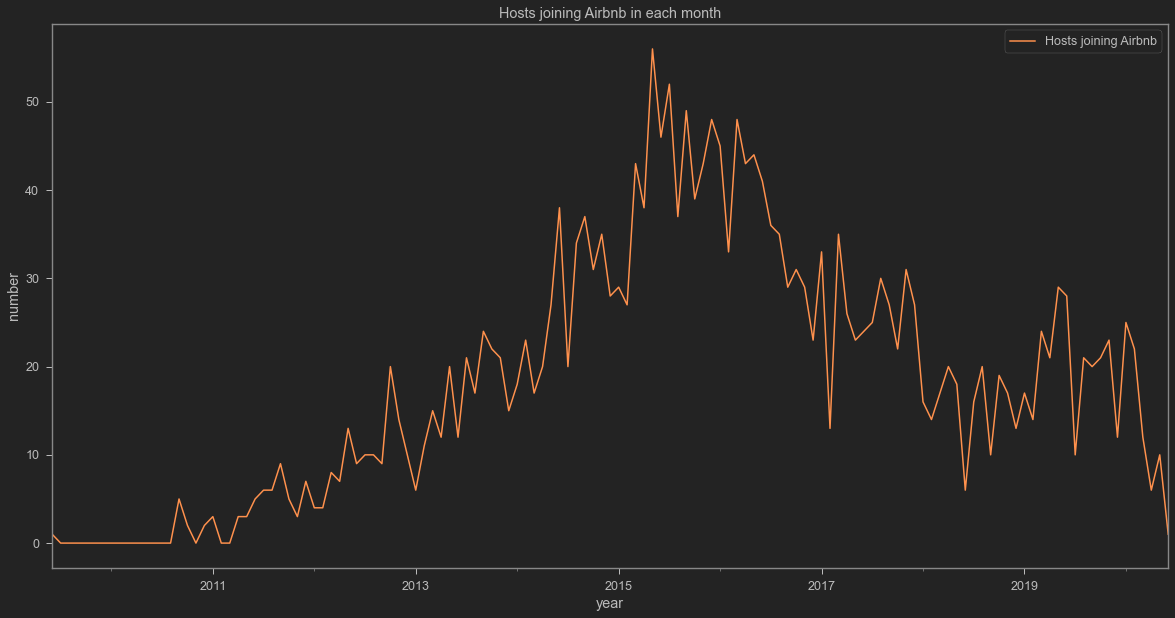

In [115]:
plt.figure(figsize=(20,10))
beginhost.plot(label='Hosts joining Airbnb', color='y')
plt.title('Singapore Hosts joining Airbnb in each month')
plt.xlabel('year')
plt.ylabel('number')
plt.legend()
plt.show()

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose

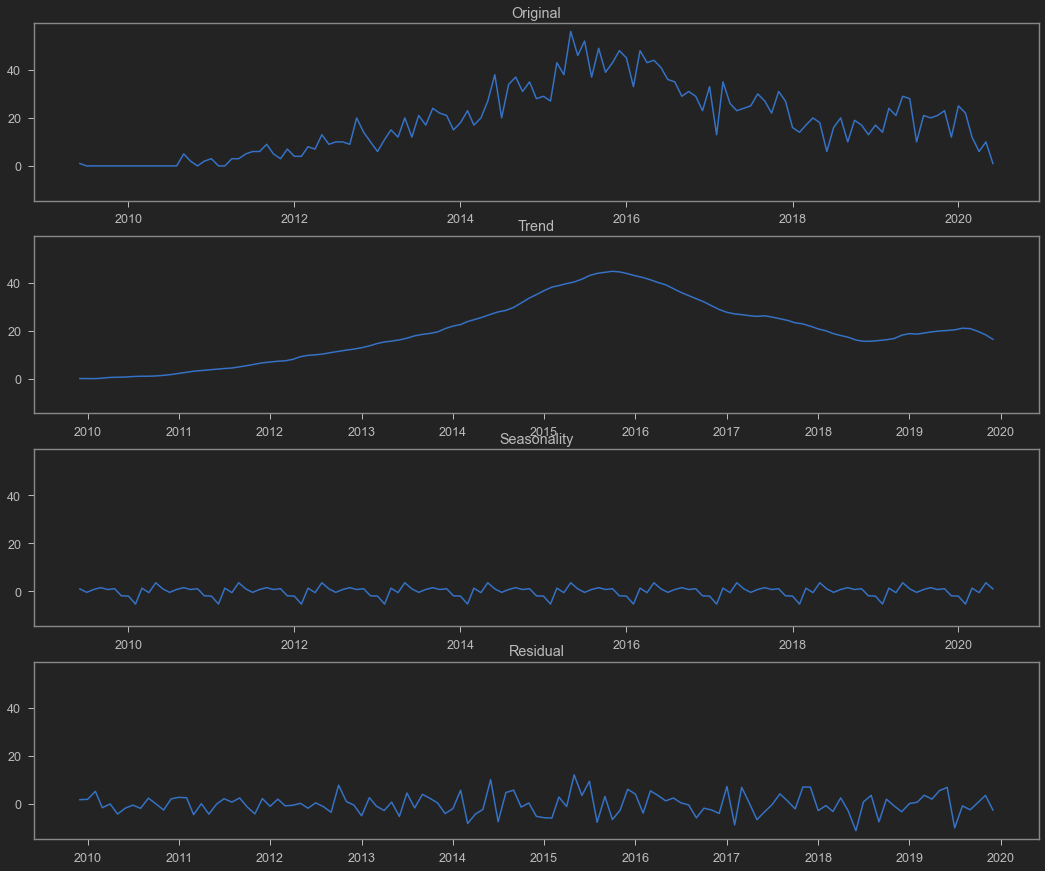

In [118]:
decomposition_host=seasonal_decompose(beginhost)

#trend, seasonality, noise
trend_host=decomposition_host.trend
seasonality_host=decomposition_host.seasonal
residual_host=decomposition_host.resid

#plotting
f,(ax1)=plt.subplots(4,1,sharey=True, figsize=(18,15))

ax1[0].set_title('Original')
ax1[0].plot(beginhost, label='original')

ax1[1].set_title('Trend')
ax1[1].plot(trend_host, label='Trend')

ax1[2].set_title('Seasonality')
ax1[2].plot(seasonality_host, label='Seasonality')

ax1[3].set_title('Residual')
ax1[3].plot(residual_host, label='Residual')

**REFERENCES** :
1. https://towardsdatascience.com/predicting-airbnb-prices-with-deep-learning-part-2-how-to-improve-your-nightly-price-50ea8bc2bd29
2. https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453


- the following two images show the decomposed time series for the number of (currently live) hosts joining the site, and the number of (currently live) listings getting their first review. This was done using the seasonal_decompose function from the statsmodels library. It decomposes a time series into the overall trend, seasonality (which is significant in the tourism industry) and the leftover unexplained residuals. The latter could be due to a wide variety of factors. For example, the big peak in the number of hosts joining Airbnb in 2015 could be a response to the government legislation, as existing hosts may have created new accounts in order to re-list their properties and get around the 90 day limit

## Number of listing join overtime

In [121]:
listing_num = data2[['host_id','host_since','host_total_listings_count']]
listing_num.head()

,host_id,host_since,host_total_listings_count
0,266763,2010-10-20,2.0
1,227796,2010-09-08,1.0
2,266763,2010-10-20,2.0
3,367042,2011-01-29,8.0
4,367042,2011-01-29,8.0


In [122]:
data2['first_review'].isna().sum()

2835

In [123]:
numlisting = data2[['first_review']]

In [124]:
numlisting.head()

,first_review
0,2013-10-21
1,2014-04-18
2,2011-06-25
3,2011-12-19
4,2011-07-30


In [127]:
numlisting['first_review']=pd.to_datetime(numlisting['first_review'])

In [128]:
numlisting.dropna(inplace=True)

In [129]:
numlisting.isna().sum()

first_review    0
dtype: int64

In [130]:
firstreviewlisting=numlisting.set_index('first_review').resample('MS').size()

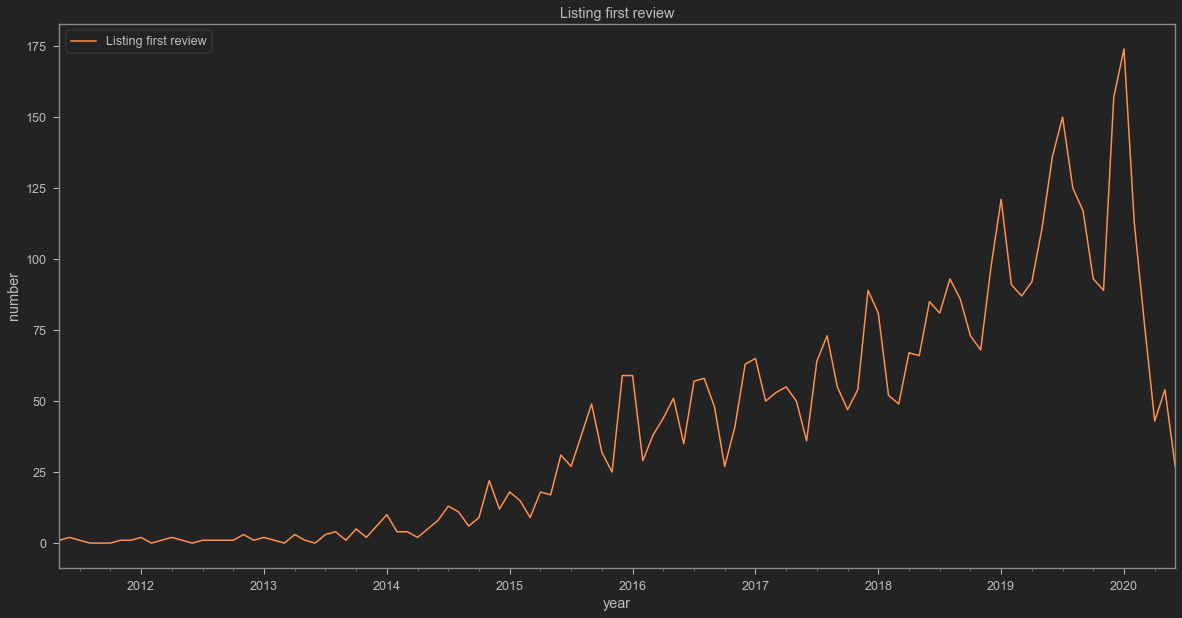

In [137]:
plt.figure(figsize=(20,10))
firstreviewlisting.plot(label='Listing first review', color='y')
plt.title('Listing first review')
plt.xlabel('year')
plt.ylabel('number')
plt.legend()
plt.show()

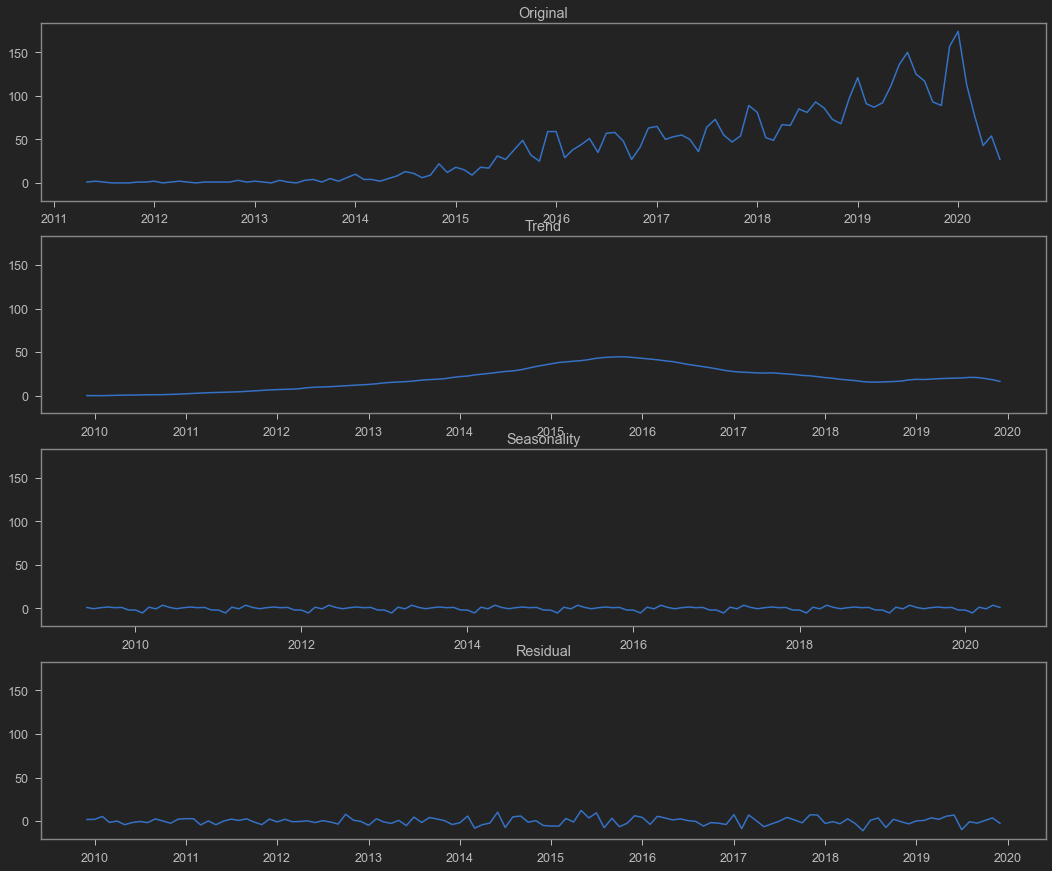

In [138]:
decomposition_host=seasonal_decompose(beginhost)

#trend, seasonality, noise
trend_host=decomposition_host.trend
seasonality_host=decomposition_host.seasonal
residual_host=decomposition_host.resid

#plotting
f,(ax1)=plt.subplots(4,1,sharey=True, figsize=(18,15))

ax1[0].set_title('Original')
ax1[0].plot(firstreviewlisting, label='original')

ax1[1].set_title('Trend')
ax1[1].plot(trend_host, label='Trend')

ax1[2].set_title('Seasonality')
ax1[2].plot(seasonality_host, label='Seasonality')

ax1[3].set_title('Residual')
ax1[3].plot(residual_host, label='Residual')

## Plot combined

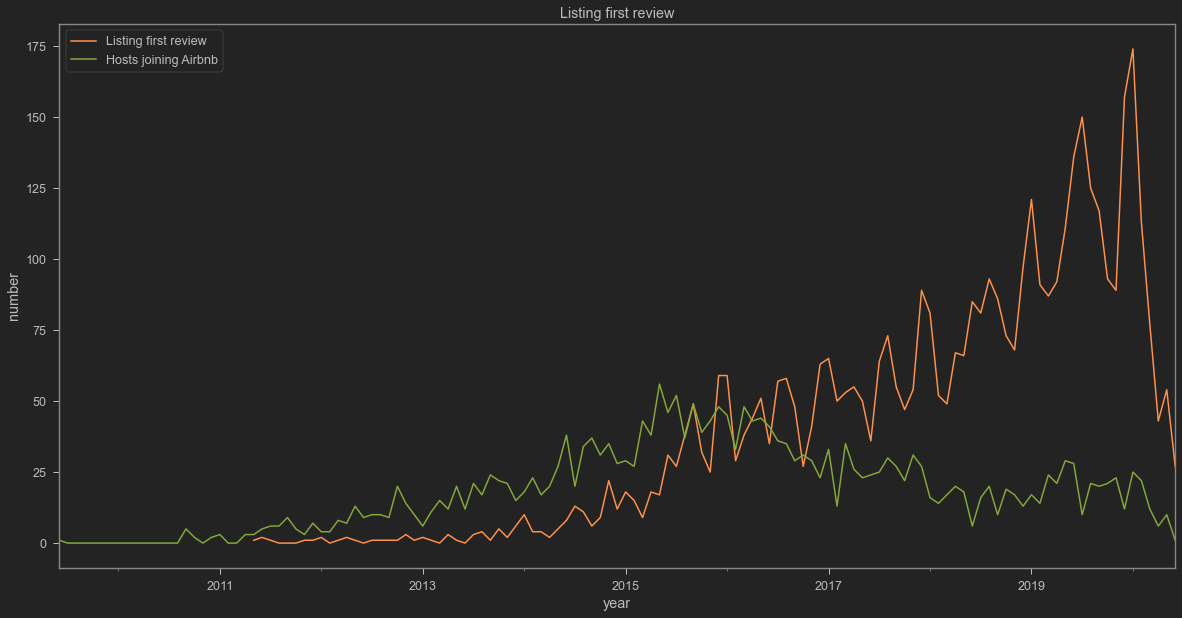

In [136]:
plt.figure(figsize=(20,10))
firstreviewlisting.plot(label='Listing first review', color='y')
beginhost.plot(label='Hosts joining Airbnb', color='g')
plt.title('Listing first review')
plt.xlabel('year')
plt.ylabel('number')
plt.legend()
plt.show()

Informasi terkait grafik:

1. Penambahan Host pada tahun 2010-2015 memiliki trend yang positif dan bersifat uptrend hingga pertengahan 2015-2016. Puncak trend berada pertengahan tahun 2015-2016 kemudian mengalami downtrend hingga 2017. Pada tahun 2017 - 2019 masuk dalam posisi sideways, dimana penambahan sebagai host tidak signifikan. dan mengalami penurunan yang tajam dari akhir 2019. Bisa dipastikan pada masa itu memasuki masa covid-19.
2. Pertumbuhan grafik dari review listing pada pertengahan 2011 hingga akhir 2019 secara eksponensial kemudian drop di akhir tahun 2019 hingga sekarang. Bisa dipastikan kondisi ini disebabkan oleh adanya covid-19

## Most Dominant Host at Singapore AirBnB

In [141]:
host_start.sort_values('host_total_listings_count', ascending=False).head(20)

,host_id,host_name,host_since,host_total_listings_count
1653,66406177,Jay,2016-04-09,392
2322,138649185,Paridhi,2017-07-05,239
7116,1983426,Nathan,2012-03-21,231
3806,800558,Kim (金),2011-07-10,178
2607,156409670,Rj,2017-10-27,165
3697,209913841,Richards,2018-08-16,156
166,8492007,Logan,2013-08-28,153
32,2413412,Kaurus,2012-05-19,127
695,29420853,Aaron,2015-03-16,126
2945,108773366,RedDoorz,2016-12-27,107


In [164]:
url = data2[['host_name','host_id','listing_url']]

In [166]:
url[url['host_id']==66406177].head(1)

,host_name,host_id,listing_url
1653,Jay,66406177,https://www.airbnb.com/rooms/16174252


In [168]:
url[url['host_id']==1983426].head(1)

,host_name,host_id,listing_url
7116,Nathan,1983426,https://www.airbnb.com/rooms/43343196


In [169]:
url[url['host_id']==800558].head(1)

,host_name,host_id,listing_url
3806,Kim (金),800558,https://www.airbnb.com/rooms/29545454


1. Posisi pertama untuk host dengan listing terbanyak saya asumsikan sebagai warga negara asli Singapore
    Nama    : Jay 
    Profile : https://www.airbnb.com/users/show/66406177
2. Listing terbanyak kedua merupakan warga negara Austria dan tinggal di Vienna ( Austria ) 
    Nama    : Paridhi
    Profile : https://www.airbnb.com/users/show/39330021
3. Listing terbanyak keempat merupakan warga negara Belanda dan tinggal di Thailand
    Nama    : Kim
    Profile : https://www.airbnb.com/users/show/800558




`Dari data diatas, kita memfokuskan ke Nationality dari host airbnb, dimana pemilik bukan hanya dari warga negara asli Singapore, melainkan sudah go Internasional`

## Jumlah Review

In [28]:
data.nlargest(10, 'number_of_reviews')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_is_superhost,property_type,bedrooms,beds,guests_included,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,len_amenities
108,2129215,Luxuriously Spacious Studio Apt.,7642747,Shirley,East Region,Bedok,1.32122,103.91492,Entire home/apt,139,2,370,4.72,1,1,t,Townhouse,1.0,3.0,3,99.0,f,1.0,150.0,52.0,34
986,10848771,Spacious room near Woodleigh MRT,44793532,Yuan,Central Region,Toa Payoh,1.33514,103.87622,Private room,49,1,354,6.74,2,145,t,House,1.0,1.0,1,97.0,f,1.0,0.0,0.0,26
116,2357514,Heritage Shophouse Right in Epicentre of Sights,1346787,Val,Central Region,Outram,1.28448,103.84360,Private room,89,1,336,5.06,3,365,f,Apartment,1.0,1.0,1,89.0,f,1.0,200.0,75.0,17
554,7605283,"Clean cosy room, 7 mins to Sentosa",34333799,Felix,Central Region,Bukit Merah,1.27718,103.82167,Private room,73,3,322,5.55,1,257,t,Apartment,1.0,2.0,2,98.0,f,1.0,0.0,0.0,25
212,4108082,Central Haven,21313007,Callie & Kel,Central Region,Tanglin,1.29312,103.82979,Entire home/apt,218,14,312,4.52,1,1,f,Apartment,2.0,3.0,2,92.0,t,1.5,300.0,35.0,38
369,5827998,The Lily Room,30080617,Eddie,East Region,Tampines,1.34463,103.96107,Private room,60,30,296,4.68,7,180,t,House,1.0,1.0,1,97.0,f,0.5,0.0,20.0,10
368,5827713,The Private Sanctuary,30080617,Eddie,East Region,Tampines,1.34495,103.96043,Private room,70,90,285,4.54,7,0,t,House,1.0,1.0,1,96.0,f,1.0,0.0,20.0,16
584,7843168,1 Super Single Bed In Private Room,40912923,Erin,Central Region,Geylang,1.31422,103.90481,Private room,41,1,285,4.86,4,0,f,Villa,1.0,1.0,1,95.0,f,1.0,0.0,0.0,14
331,5377342,S5 @ City Central,25116861,Studios,Central Region,Rochor,1.30386,103.85459,Entire home/apt,108,5,283,4.37,10,180,t,Apartment,1.0,1.0,2,95.0,f,1.0,136.0,0.0,23
1194,12703293,"Bright & Airy, Safari-Colonial Loft!",17032962,Shu,Central Region,Rochor,1.31225,103.85431,Entire home/apt,152,1,270,5.35,16,176,f,Loft,1.0,2.0,2,96.0,f,1.0,700.0,45.0,31


Berikut adalah 10 review terhadap listing yang populer. Tujuh diantaranya berada pada Central Region Neighbourhood. Tipe ruangan sebagian besar adalah Private room

# AMENITIES

In [208]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Fungsi Stopwords adalah untuk menghilangkan kata penghubung, seperti the, an, a, dll.

In [170]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 5.9+ MB


In [171]:
data2['amenities']

0       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
1       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2       {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...
3       {TV,Wifi,"Air conditioning",Kitchen,"Pets live...
4       {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
                              ...                        
7318    {Wifi,"Air conditioning",Kitchen,Washer,"Lock ...
7319    {TV,Wifi,"Air conditioning",Pool,Kitchen,Gym,"...
7320    {TV,Wifi,"Air conditioning",Pool,Kitchen,Gym,E...
7321    {Wifi,"Air conditioning",Pool,Kitchen,Gym,Wash...
7322    {Wifi,"Air conditioning",Kitchen,"Smoking allo...
Name: amenities, Length: 7323, dtype: object

In [175]:
amenities = data2[['amenities']]

In [172]:
import re

In [173]:
def clean_amenities(col):
    clean=re.sub('[{""}]','', col)
#     clean=re.sub('[""]','',clean)
    clean=clean.split(',')
    return clean

In [176]:
amenities['words']=amenities['amenities'].apply(clean_amenities)
amenities['len_amenities']=amenities['amenities'].apply(lambda x:len(x.split(','))-1)

In [177]:
amenities.isna().sum()

amenities        0
words            0
len_amenities    0
dtype: int64

In [178]:
amenities.head(3)

,amenities,words,len_amenities
0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","[TV, Cable TV, Internet, Wifi, Air conditionin...",8
1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","[TV, Cable TV, Internet, Wifi, Air conditionin...",12
2,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...","[TV, Cable TV, Wifi, Air conditioning, Kitchen...",9


In [180]:
words_storage=[]
for item in amenities['words']:
    for word in item:
        words_storage.append(word)
        
### words_storage nantinya akan dipakai untuk penggunaan WordCloud

In [181]:
words_unique = pd.DataFrame(pd.Series(words_storage).value_counts())

In [182]:
words_unique.reset_index(inplace=True)

In [183]:
words_unique.columns = ['word','count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

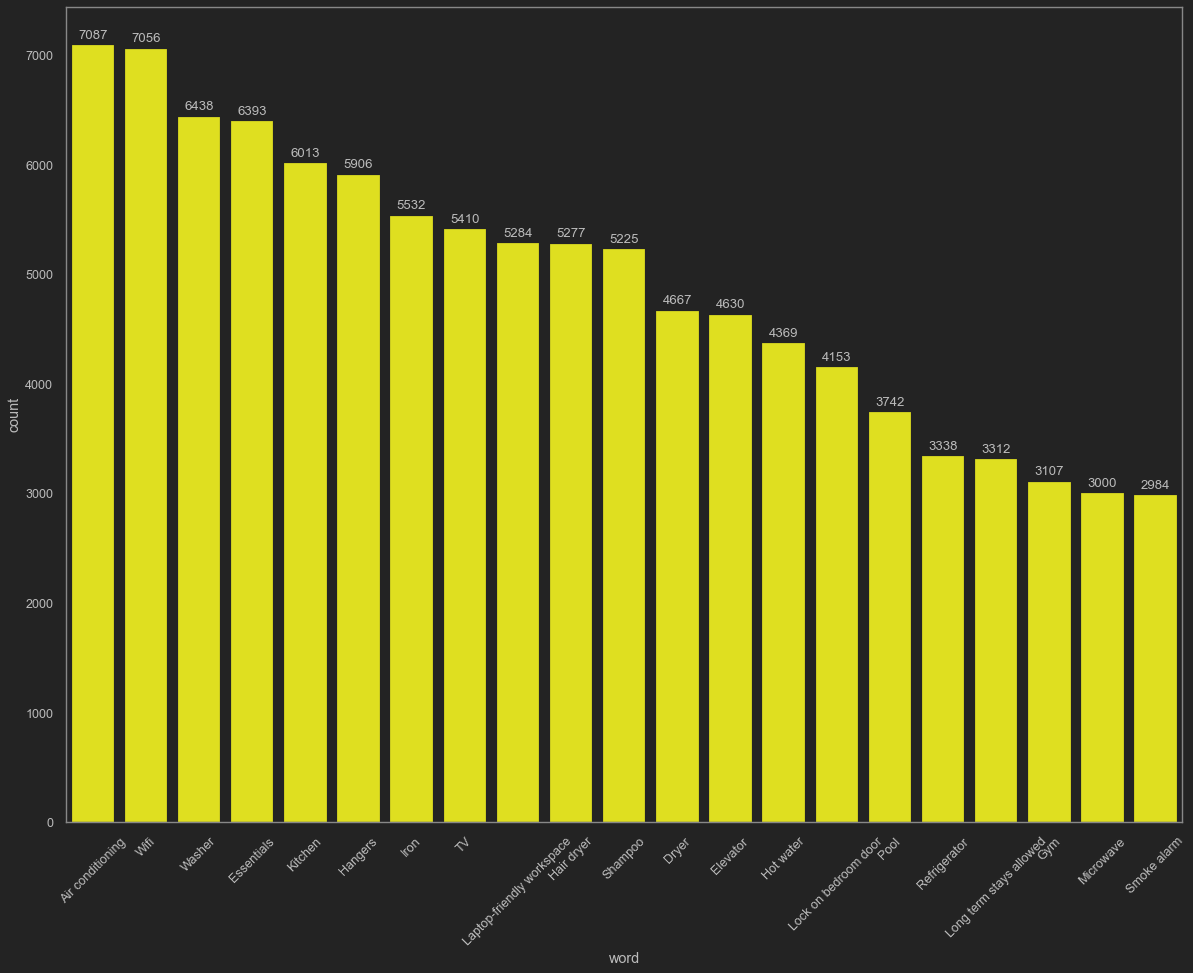

In [199]:
plt.figure(figsize=(20,15))
a= sns.barplot(words_unique['word'][:21],words_unique['count'][:21],color='yellow')
for p in a.patches:
    a.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

plt.xticks(rotation=45)

In [206]:
words_warehouse= ' '.join(words_storage)

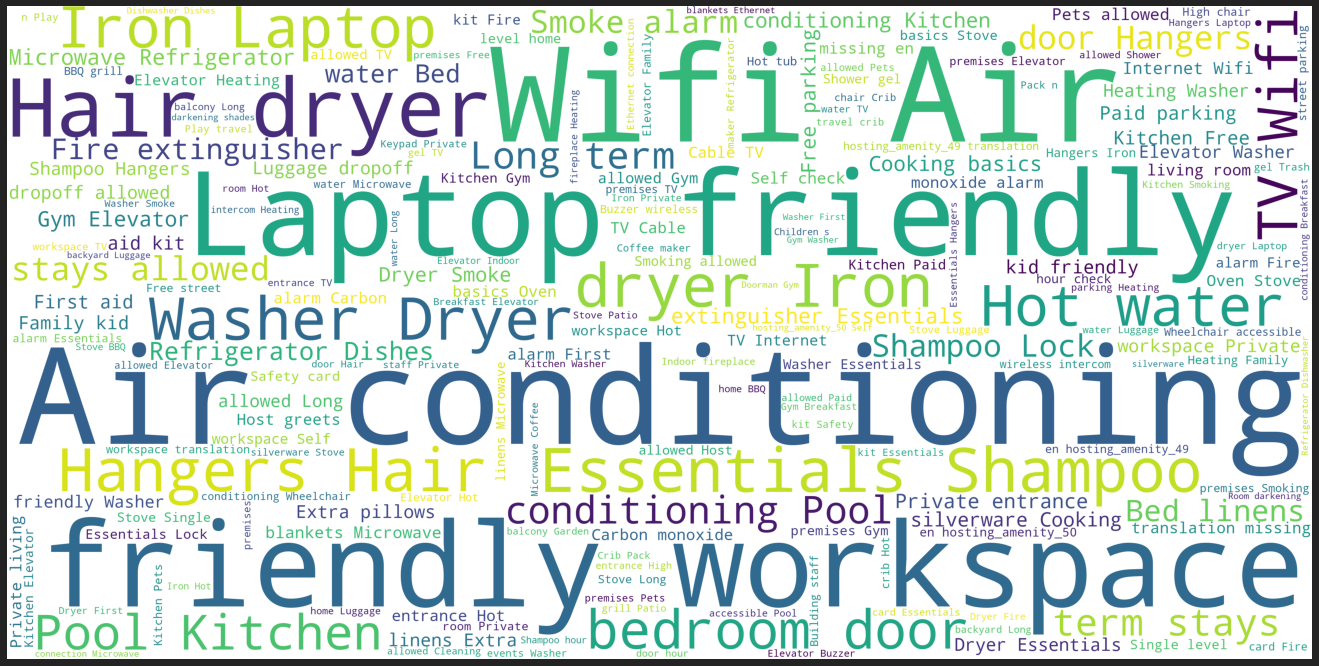

In [210]:
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(words_warehouse)
plt.figure(figsize = (25,12))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

- Seperti yang bisa dilihat pada wordcloud diatas, Air conditioning adalah kata yang lebih dominan, Wifi, Essentials Shampoo. Kuantitas dari Kata-kata amenities tersebut bisa dilihat dari grafik bar sebelumnya.

- Kesimpulannya, jika ingin memulai bisnis property, menyewakan property melalui AirBnb, pastikan untuk memeliki fasilitas-fasilitas yang tertera di wordcloud
